## CURSO DE CIÊNCIA DE DADOS

## TRABALHO 2

## Importando as Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm, kstest
%matplotlib inline

In [5]:
# Ler o arquivo CSV
df3_soccer = pd.read_csv('C:\\Users\\user\\Desktop\\Jupyter\\df3_soccer_csv3.csv')

# Exibir as primeiras linhas do DataFrame
df3_soccer

,Unnamed: 0,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
0,1,Brenden,Aaronson,USA,"LT,AT",Leeds United,Premier League,21,2000,36,...,"0,04","0,11","0,15","0,04","0,15","0,15","0,16","0,31","0,15","0,31"
1,2,Paxten,Aaronson,USA,"LT,ZG",Eint Frankfurt,Bundesliga,18,2003,7,...,"0,00","0,00","0,00","0,00","0,00","0,09","0,03","0,11","0,09","0,11"
2,3,James,Abankwah,IRL,ZG,Udinese,Serie A,18,2004,2,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,4,George,Abbott,ENG,LT,Tottenham,Premier League,16,2005,1,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,34,1987,37,...,"0,03","0,05","0,08","0,03","0,08","0,06","0,03","0,09","0,06","0,09"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,2770,Szymon,Żurkowski,POL,LT,Fiorentina,Serie A,24,1997,2,...,"0,00","2,81","2,81","0,00","2,81","0,33","0,06","0,40","0,33","0,40"
2770,2771,Szymon,Żurkowski,POL,LT,Spezia,Serie A,24,1997,10,...,"0,00","0,00","0,00","0,00","0,00","0,12","0,00","0,12","0,12","0,12"
2771,2772,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,23,1998,37,...,"0,43","0,20","0,63","0,43","0,63","0,29","0,23","0,52","0,29","0,52"
2772,2773,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,32,1990,28,...,"0,07","0,07","0,13","0,07","0,13","0,09","0,08","0,18","0,09","0,18"


## Análise Estatística e Exploratória de Dados

A seguir estarei calculando a media, mediana e moda para Idade, Minutos jogados , Gols, Assistência , Cartões Amarelos , Cartões Vermelhos,Carregadas Progressivas , Passes Progressivos , Passes Progressivos Recebidos.
Também estarei calculando a media, mediana e moda para todos os Jogadores e também estarei calculando por Posição.

In [6]:
# Media de Idade dos Jogadores
df3_soccer['Idade'] = pd.to_numeric(df3_soccer['Idade'], errors='coerce')
media_Idade=df3_soccer['Idade'].mean()
print("Média das idades:", media_Idade)

Média das idades: 25.22134102379236


In [7]:
# Mediana de Idade dos Jogadores
mediana_Idade=df3_soccer['Idade'].median()
print("Mediana das idades:", mediana_Idade)

Mediana das idades: 25.0


In [8]:
# Moda da Idade dos Jogadores
moda_Idade=df3_soccer['Idade'].mode().values[0]
print("Moda das idades:", moda_Idade)

Moda das idades: 25


In [9]:
# Média de Minutos jogados dos jogadores
df3_soccer['Minutos jogados'] = pd.to_numeric(df3_soccer['Minutos jogados'], errors='coerce')
media_Minutos_jogados = df3_soccer['Minutos jogados'].mean()
print("Média de Minutos jogados por jogador:", media_Minutos_jogados)

Média de Minutos jogados por jogador: 169.9301441961067


In [10]:
# Mediana de Minutos jogados dos jogadores
Mediana_Minutos_jogados_jogador= df3_soccer['Minutos jogados'].median()
print("Mediana de Minutos jogados por jogador:", Mediana_Minutos_jogados_jogador)

Mediana de Minutos jogados por jogador: 3.0


In [11]:
# Moda de Minutos jogados dos jogadores
moda_Gols_jogador=df3_soccer['Minutos jogados'].mode().values[0]
print("Moda da quantidade de Minutos jogados:", moda_Gols_jogador)

Moda da quantidade de Minutos jogados: 1.0


In [12]:
# Média de Gols dos jogadores
df3_soccer['Gols'] = pd.to_numeric(df3_soccer['Gols'], errors='coerce')
media_Gols = df3_soccer['Gols'].mean()
print("Média de Gols por jogador:", media_Gols)

Média de Gols por jogador: 1.6788031723143475


In [13]:
# Média de Gols por Posição
def Media_Gols_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_gols_df = posição_df['Gols']
    media_Gols = coluna_gols_df.mean()
    return media_Gols

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Gols = Media_Gols_Posicao(df3_soccer, posição)
    print("Média de gols para a posição", posição, ":", media_Gols)

Média de gols para a posição LT,AT : 2.293103448275862
Média de gols para a posição LT,ZG : 0.8709677419354839
Média de gols para a posição ZG : 0.6164705882352941
Média de gols para a posição LT : 1.2683333333333333
Média de gols para a posição AT,LT : 3.15
Média de gols para a posição AT : 4.535714285714286
Média de gols para a posição G : 0.0
Média de gols para a posição ZG,AT : 0.5384615384615384
Média de gols para a posição ZG,LT : 1.1862745098039216
Média de gols para a posição AT,ZG : 2.1818181818181817


In [14]:
# Mediana de Gols dos jogadores
Mediana_Gols_jogador= df3_soccer['Gols'].median()
print("Mediana de Gols por jogador:", Mediana_Gols_jogador)

Mediana de Gols por jogador: 0.0


In [15]:
# Mediana de Gols dos jogadores
def Mediana_Gols_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Gols_df = posição_df['Gols']
    mediana_Gols = coluna_Gols_df.median()
    return mediana_Gols

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Gols = Mediana_Gols_Posição(df3_soccer, posição)
    print("Mediana de Gols por Posição do tipo", posição  + ":", mediana_Gols)

Mediana de Gols por Posição do tipo LT,AT: 1.0
Mediana de Gols por Posição do tipo LT,ZG: 0.0
Mediana de Gols por Posição do tipo ZG: 0.0
Mediana de Gols por Posição do tipo LT: 0.0
Mediana de Gols por Posição do tipo AT,LT: 2.0
Mediana de Gols por Posição do tipo AT: 2.0
Mediana de Gols por Posição do tipo G: 0.0
Mediana de Gols por Posição do tipo ZG,AT: 0.0
Mediana de Gols por Posição do tipo ZG,LT: 0.0
Mediana de Gols por Posição do tipo AT,ZG: 1.5


In [16]:
# Moda de Gols dos jogadores
moda_Gols_jogador=df3_soccer['Gols'].mode().values[0]
print("Moda da quantidade de gols:", moda_Gols_jogador)

Moda da quantidade de gols: 0


In [17]:
# Moda de Gols por Posição
def Moda_Gols_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Gols_df = posição_df['Gols']
    moda_Gols = coluna_Gols_df.mode().values[0]
    return moda_Gols

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Gols = Moda_Gols_Posição(df3_soccer, posição)
    print("Moda de Gols por Posição do tipo", posição  + ":", moda_Gols)

Moda de Gols por Posição do tipo LT,AT: 0
Moda de Gols por Posição do tipo LT,ZG: 0
Moda de Gols por Posição do tipo ZG: 0
Moda de Gols por Posição do tipo LT: 0
Moda de Gols por Posição do tipo AT,LT: 0
Moda de Gols por Posição do tipo AT: 0
Moda de Gols por Posição do tipo G: 0
Moda de Gols por Posição do tipo ZG,AT: 0
Moda de Gols por Posição do tipo ZG,LT: 0
Moda de Gols por Posição do tipo AT,ZG: 0


In [18]:
# Média de Assistências dos Jogadores
df3_soccer['Assistências'] = pd.to_numeric(df3_soccer['Assistências'], errors='coerce')
media_Assistencias_jogador = df3_soccer['Assistências'].mean()
print("Média de Assistências por jogador:", media_Assistencias_jogador)

Média de Assistências por jogador: 1.1683489545782264


In [19]:
# Média de Assistências por Posição
def Media_Assistencias_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Assistencias_df = posição_df['Assistências']
    media_Assistencias = coluna_Assistencias_df.mean()
    return media_Assistencias

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Assistencias = Media_Assistencias_Posicao(df3_soccer, posição)
    print("Média de Assistencias para a posição", posição, ":", media_Assistencias)

Média de Assistencias para a posição LT,AT : 1.9612068965517242
Média de Assistencias para a posição LT,ZG : 0.8709677419354839
Média de Assistencias para a posição ZG : 0.7505882352941177
Média de Assistencias para a posição LT : 1.25
Média de Assistencias para a posição AT,LT : 1.7566666666666666
Média de Assistencias para a posição AT : 1.6620879120879122
Média de Assistencias para a posição G : 0.06403940886699508
Média de Assistencias para a posição ZG,AT : 1.205128205128205
Média de Assistencias para a posição ZG,LT : 1.2549019607843137
Média de Assistencias para a posição AT,ZG : 1.0909090909090908


In [20]:
# Mediana de Assistências dos Jogadores
mediana_Assistencias_jogador=df3_soccer['Assistências'].median()
print("Mediana de Assistências por jogador:", mediana_Assistencias_jogador)

Mediana de Assistências por jogador: 0.0


In [21]:
# Mediana de Assistências por Posição
def Mediana_Assistencias_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Assistencias_df = posição_df['Assistências']
    mediana_Assistencias = coluna_Assistencias_df.median()
    return mediana_Assistencias

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Assistencias = Mediana_Assistencias_Posição(df3_soccer, posição)
    print("Mediana de Assistências por Posição do tipo", posição  + ":", mediana_Assistencias)

Mediana de Assistências por Posição do tipo LT,AT: 1.0
Mediana de Assistências por Posição do tipo LT,ZG: 0.0
Mediana de Assistências por Posição do tipo ZG: 0.0
Mediana de Assistências por Posição do tipo LT: 0.0
Mediana de Assistências por Posição do tipo AT,LT: 1.0
Mediana de Assistências por Posição do tipo AT: 1.0
Mediana de Assistências por Posição do tipo G: 0.0
Mediana de Assistências por Posição do tipo ZG,AT: 0.0
Mediana de Assistências por Posição do tipo ZG,LT: 1.0
Mediana de Assistências por Posição do tipo AT,ZG: 0.0


In [22]:
# Moda de Assistências dos Jogadores
moda_Assistencias_jogador=df3_soccer['Assistências'].mode().values[0]
print("Moda da quantidade de Assistências:", moda_Assistencias_jogador)

Moda da quantidade de Assistências: 0


In [23]:
# Moda de Assistências por Posição
def Moda_Assistencias_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Assistencias_df = posição_df['Assistências']
    moda_Assistencias = coluna_Assistencias_df.mode().values[0]
    return moda_Assistencias

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Assistencias = Moda_Assistencias_Posição(df3_soccer, posição)
    print("Moda de Assistências por Posição do tipo", posição  + ":", moda_Assistencias)

Moda de Assistências por Posição do tipo LT,AT: 0
Moda de Assistências por Posição do tipo LT,ZG: 0
Moda de Assistências por Posição do tipo ZG: 0
Moda de Assistências por Posição do tipo LT: 0
Moda de Assistências por Posição do tipo AT,LT: 0
Moda de Assistências por Posição do tipo AT: 0
Moda de Assistências por Posição do tipo G: 0
Moda de Assistências por Posição do tipo ZG,AT: 0
Moda de Assistências por Posição do tipo ZG,LT: 0
Moda de Assistências por Posição do tipo AT,ZG: 0


In [24]:
# Média de Cartões Amarelos dos Jogadores
df3_soccer['Cartões Amarelos'] = pd.to_numeric(df3_soccer['Cartões Amarelos'], errors='coerce')
media_Cartões_Amarelos_jogador = df3_soccer['Cartões Amarelos'].mean()
print("Média de Cartões_Amarelos por jogador:", media_Cartões_Amarelos_jogador)

Média de Cartões_Amarelos por jogador: 2.5825522710886806


In [25]:
# Média de Cartões Amarelos por Posição
def Media_Cartões_Amarelos_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Cartões_Amarelos_df = posição_df['Cartões Amarelos']
    media_Cartões_Amarelos = coluna_Cartões_Amarelos_df.mean()
    return media_Cartões_Amarelos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Cartões_Amarelos = Media_Cartões_Amarelos_Posicao(df3_soccer, posição)
    print("Média de Cartões_Amarelos para a posição", posição, ":", media_Cartões_Amarelos)

Média de Cartões_Amarelos para a posição LT,AT : 2.288793103448276
Média de Cartões_Amarelos para a posição LT,ZG : 3.0
Média de Cartões_Amarelos para a posição ZG : 3.144705882352941
Média de Cartões_Amarelos para a posição LT : 3.21
Média de Cartões_Amarelos para a posição AT,LT : 1.8633333333333333
Média de Cartões_Amarelos para a posição AT : 2.0
Média de Cartões_Amarelos para a posição G : 0.896551724137931
Média de Cartões_Amarelos para a posição ZG,AT : 1.8205128205128205
Média de Cartões_Amarelos para a posição ZG,LT : 2.6372549019607843
Média de Cartões_Amarelos para a posição AT,ZG : 1.7727272727272727


In [26]:
# Mediana de Cartões Amarelos dos Jogadores
mediana_Cartões_Amarelos_jogador=df3_soccer['Cartões Amarelos'].median()
print("Mediana de Cartões Amarelos por jogador:", mediana_Cartões_Amarelos_jogador)

Mediana de Cartões Amarelos por jogador: 2.0


In [27]:
# Mediana de Cartões Amarelos por Posição
def Mediana_Cartões_Amarelos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Cartões_Amarelos_df = posição_df['Cartões Amarelos']
    mediana_Cartões_Amarelos = coluna_Cartões_Amarelos_df.median()
    return mediana_Cartões_Amarelos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Cartões_Amarelos = Mediana_Cartões_Amarelos_Posição(df3_soccer, posição)
    print("Mediana de Cartões Amarelos por Posição do tipo", posição + ":", mediana_Cartões_Amarelos)

Mediana de Cartões Amarelos por Posição do tipo LT,AT: 2.0
Mediana de Cartões Amarelos por Posição do tipo LT,ZG: 2.0
Mediana de Cartões Amarelos por Posição do tipo ZG: 3.0
Mediana de Cartões Amarelos por Posição do tipo LT: 3.0
Mediana de Cartões Amarelos por Posição do tipo AT,LT: 1.0
Mediana de Cartões Amarelos por Posição do tipo AT: 1.0
Mediana de Cartões Amarelos por Posição do tipo G: 0.0
Mediana de Cartões Amarelos por Posição do tipo ZG,AT: 2.0
Mediana de Cartões Amarelos por Posição do tipo ZG,LT: 2.0
Mediana de Cartões Amarelos por Posição do tipo AT,ZG: 1.0


In [28]:
# Moda de Cartões Amarelos dos Jogadores
moda_Cartões_Amarelos_jogador=df3_soccer['Cartões Amarelos'].mode().values[0]
print("Moda da quantidade de Cartões Amarelos:", moda_Cartões_Amarelos_jogador)

Moda da quantidade de Cartões Amarelos: 0


In [29]:
# Moda de Cartões Amarelos por Posição
def Moda_Cartões_Amarelos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Cartões_Amarelos_df = posição_df['Cartões Amarelos']
    moda_Cartões_Amarelos = coluna_Cartões_Amarelos_df.mode().values[0]
    return moda_Cartões_Amarelos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Cartões_Amarelos = Moda_Cartões_Amarelos_Posição(df3_soccer, posição)
    print("Moda de Cartões Amarelos por Posição do tipo", posição  + ":", moda_Cartões_Amarelos)

Moda de Cartões Amarelos por Posição do tipo LT,AT: 0
Moda de Cartões Amarelos por Posição do tipo LT,ZG: 0
Moda de Cartões Amarelos por Posição do tipo ZG: 0
Moda de Cartões Amarelos por Posição do tipo LT: 0
Moda de Cartões Amarelos por Posição do tipo AT,LT: 0
Moda de Cartões Amarelos por Posição do tipo AT: 0
Moda de Cartões Amarelos por Posição do tipo G: 0
Moda de Cartões Amarelos por Posição do tipo ZG,AT: 0
Moda de Cartões Amarelos por Posição do tipo ZG,LT: 0
Moda de Cartões Amarelos por Posição do tipo AT,ZG: 0


In [30]:
# Média de Cartões Vermelhos dos Jogadores
df3_soccer['Cartões Vermelhos'] = pd.to_numeric(df3_soccer['Cartões Vermelhos'], errors='coerce')
media_cartoes_vermelhos_jogador = df3_soccer['Cartões Vermelhos'].mean()
print("Média de Cartões Vermelhos por jogador:", media_cartoes_vermelhos_jogador)

Média de Cartões Vermelhos por jogador: 0.12797404470079307


In [31]:
# Média de Cartões Vermelhos por Posição
def Media_Cartões_Vermelhos_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Cartões_Vermelhos_df = posição_df['Cartões Vermelhos']
    media_Cartões_Vermelhos = coluna_Cartões_Vermelhos_df.mean()
    return media_Cartões_Vermelhos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Cartões_Vermelhos = Media_Cartões_Vermelhos_Posicao(df3_soccer, posição)
    print("Média de Cartões Vermelhos para a posição", posição, ":", media_Cartões_Vermelhos)

Média de Cartões Vermelhos para a posição LT,AT : 0.05603448275862069
Média de Cartões Vermelhos para a posição LT,ZG : 0.16129032258064516
Média de Cartões Vermelhos para a posição ZG : 0.1952941176470588
Média de Cartões Vermelhos para a posição LT : 0.125
Média de Cartões Vermelhos para a posição AT,LT : 0.10666666666666667
Média de Cartões Vermelhos para a posição AT : 0.09065934065934066
Média de Cartões Vermelhos para a posição G : 0.04433497536945813
Média de Cartões Vermelhos para a posição ZG,AT : 0.07692307692307693
Média de Cartões Vermelhos para a posição ZG,LT : 0.13725490196078433
Média de Cartões Vermelhos para a posição AT,ZG : 0.0


In [32]:
# Mediana de Cartões Vermelhos dos Jogadores
moda_Cartões_Vermelhos_jogador=df3_soccer['Cartões Vermelhos'].mode().values[0]
print("Moda da quantidade de Cartões Vermelhos:", moda_Cartões_Vermelhos_jogador)

Moda da quantidade de Cartões Vermelhos: 0


In [33]:
# Mediana de Cartões Vermelhos por Posição
def Mediana_Cartões_Vermelhos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Cartões_Vermelhos_df = posição_df['Cartões Vermelhos']
    mediana_Cartões_Vermelhos = coluna_Cartões_Vermelhos_df.median()
    return mediana_Cartões_Vermelhos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Cartões_Vermelhos = Mediana_Cartões_Vermelhos_Posição(df3_soccer, posição)
    print("Mediana de Cartões Vermelhos por Posição do tipo", posição + ":", mediana_Cartões_Vermelhos)

Mediana de Cartões Vermelhos por Posição do tipo LT,AT: 0.0
Mediana de Cartões Vermelhos por Posição do tipo LT,ZG: 0.0
Mediana de Cartões Vermelhos por Posição do tipo ZG: 0.0
Mediana de Cartões Vermelhos por Posição do tipo LT: 0.0
Mediana de Cartões Vermelhos por Posição do tipo AT,LT: 0.0
Mediana de Cartões Vermelhos por Posição do tipo AT: 0.0
Mediana de Cartões Vermelhos por Posição do tipo G: 0.0
Mediana de Cartões Vermelhos por Posição do tipo ZG,AT: 0.0
Mediana de Cartões Vermelhos por Posição do tipo ZG,LT: 0.0
Mediana de Cartões Vermelhos por Posição do tipo AT,ZG: 0.0


In [34]:
# Moda de Cartões Vermelhos dos Jogadores
moda_Cartões_Vermelhos_jogador=df3_soccer['Cartões Vermelhos'].mode().values[0]
print("Moda da quantidade de Cartões Vermelhos:", moda_Cartões_Vermelhos_jogador)

Moda da quantidade de Cartões Vermelhos: 0


In [35]:
# Moda de Cartões Vermelhos por Posição
def Moda_Cartões_Vermelhos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Cartões_Vermelhos_df = posição_df['Cartões Vermelhos']
    moda_Cartões_Vermelhos = coluna_Cartões_Vermelhos_df.mode().values[0]
    return moda_Cartões_Vermelhos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Cartões_Vermelhos = Moda_Cartões_Vermelhos_Posição(df3_soccer, posição)
    print("Moda de Cartões Vermelhos por Posição do tipo", posição  + ":", moda_Cartões_Vermelhos)

Moda de Cartões Vermelhos por Posição do tipo LT,AT: 0
Moda de Cartões Vermelhos por Posição do tipo LT,ZG: 0
Moda de Cartões Vermelhos por Posição do tipo ZG: 0
Moda de Cartões Vermelhos por Posição do tipo LT: 0
Moda de Cartões Vermelhos por Posição do tipo AT,LT: 0
Moda de Cartões Vermelhos por Posição do tipo AT: 0
Moda de Cartões Vermelhos por Posição do tipo G: 0
Moda de Cartões Vermelhos por Posição do tipo ZG,AT: 0
Moda de Cartões Vermelhos por Posição do tipo ZG,LT: 0
Moda de Cartões Vermelhos por Posição do tipo AT,ZG: 0


In [36]:
# Média de Carregada Progressiva dos Jogadores
df3_soccer['Carregada Progressiva'] = pd.to_numeric(df3_soccer['Carregada Progressiva'], errors='coerce')
media_Carregada_Progressiva = df3_soccer['Carregada Progressiva'].mean()
print("Média de Carregada Progressiva por jogador:", media_Carregada_Progressiva)

Média de Carregada Progressiva por jogador: 21.24333093006489


In [37]:
# Média de Carregada Progressiva por Posição
def Media_Carregada_Progressiva_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Carregada_Progressiva_df = posição_df['Carregada Progressiva']
    media_Carregada_Progressiva = coluna_Carregada_Progressiva_df.mean()
    return media_Carregada_Progressiva

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Carregada_Progressiva = Media_Carregada_Progressiva_Posicao(df3_soccer, posição)
    print("Média de Carregada Progressivas para a posição", posição, ":", media_Carregada_Progressiva)

Média de Carregada Progressivas para a posição LT,AT : 31.767241379310345
Média de Carregada Progressivas para a posição LT,ZG : 18.370967741935484
Média de Carregada Progressivas para a posição ZG : 19.48470588235294
Média de Carregada Progressivas para a posição LT : 19.078333333333333
Média de Carregada Progressivas para a posição AT,LT : 31.183333333333334
Média de Carregada Progressivas para a posição AT : 23.802197802197803
Média de Carregada Progressivas para a posição G : 0.009852216748768473
Média de Carregada Progressivas para a posição ZG,AT : 25.333333333333332
Média de Carregada Progressivas para a posição ZG,LT : 27.519607843137255
Média de Carregada Progressivas para a posição AT,ZG : 27.045454545454547


In [38]:
# Mediana de Carregada Progressiva dos Jogadores
mediana_Carregada_Progressiva_jogador=df3_soccer['Carregada Progressiva'].median()
print("Mediana de Carregada Progressiva por jogador:",mediana_Carregada_Progressiva_jogador)

Mediana de Carregada Progressiva por jogador: 11.0


In [39]:
# Mediana de Carregada Progressiva por Posição
def Mediana_Carregada_Progressiva_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Carregada_Progressiva_df = posição_df['Carregada Progressiva']
    mediana_Carregada_Progressiva = coluna_Carregada_Progressiva_df.median()
    return mediana_Carregada_Progressiva

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Carregada_Progressiva = Mediana_Carregada_Progressiva_Posição(df3_soccer, posição)
    print("Mediana de Carregada Progressiva por Posição do tipo", posição  + ":", mediana_Carregada_Progressiva)

Mediana de Carregada Progressiva por Posição do tipo LT,AT: 22.0
Mediana de Carregada Progressiva por Posição do tipo LT,ZG: 11.0
Mediana de Carregada Progressiva por Posição do tipo ZG: 12.0
Mediana de Carregada Progressiva por Posição do tipo LT: 12.0
Mediana de Carregada Progressiva por Posição do tipo AT,LT: 20.0
Mediana de Carregada Progressiva por Posição do tipo AT: 12.0
Mediana de Carregada Progressiva por Posição do tipo G: 0.0
Mediana de Carregada Progressiva por Posição do tipo ZG,AT: 14.0
Mediana de Carregada Progressiva por Posição do tipo ZG,LT: 20.0
Mediana de Carregada Progressiva por Posição do tipo AT,ZG: 24.0


In [40]:
# Moda de Carregada Progressiva dos Jogadores
moda_Carregada_Progressiva_jogador=df3_soccer['Carregada Progressiva'].mode().values[0]
print("Moda da quantidade de Carregada Progressiva:", moda_Carregada_Progressiva_jogador)

Moda da quantidade de Carregada Progressiva: 0.0


In [41]:
# Moda de Carregada Progressiva por Posição 
def Moda_Carregada_Progressiva_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Carregada_Progressiva_df = posição_df['Carregada Progressiva']
    moda_Carregada_Progressiva = coluna_Carregada_Progressiva_df.mode().values[0]
    return moda_Carregada_Progressiva

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Carregada_Progressiva = Moda_Carregada_Progressiva_Posição(df3_soccer, posição)
    print("Moda de Carregada Progressiva por Posição do tipo", posição  + ":", moda_Carregada_Progressiva)

Moda de Carregada Progressiva por Posição do tipo LT,AT: 0.0
Moda de Carregada Progressiva por Posição do tipo LT,ZG: 2.0
Moda de Carregada Progressiva por Posição do tipo ZG: 0.0
Moda de Carregada Progressiva por Posição do tipo LT: 0.0
Moda de Carregada Progressiva por Posição do tipo AT,LT: 1.0
Moda de Carregada Progressiva por Posição do tipo AT: 0.0
Moda de Carregada Progressiva por Posição do tipo G: 0.0
Moda de Carregada Progressiva por Posição do tipo ZG,AT: 0.0
Moda de Carregada Progressiva por Posição do tipo ZG,LT: 0.0
Moda de Carregada Progressiva por Posição do tipo AT,ZG: 1.0


In [42]:
# Média de Passes Progressivos dos Jogadores
df3_soccer['Passes Progressivos'] = pd.to_numeric(df3_soccer['Passes Progressivos'], errors='coerce')
media_Passes_Progressivos = df3_soccer['Passes Progressivos'].mean()
print("Média de Passes Progressivos por jogador:", media_Passes_Progressivos)

Média de Passes Progressivos por jogador: 47.24657534246575


In [43]:
# Média de Passes Progressivos por Posição
def Media_Passes_Progressivos_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Passes_Progressivos_df = posição_df['Passes Progressivos']
    media_Passes_Progressivos = coluna_Passes_Progressivos_df.mean()
    return media_Passes_Progressivos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Passes_Progressivos = Media_Passes_Progressivos_Posicao(df3_soccer, posição)
    print("Média de Passes Progressivos para a posição", posição, ":", media_Passes_Progressivos)

Média de Passes Progressivos para a posição LT,AT : 50.64655172413793
Média de Passes Progressivos para a posição LT,ZG : 50.5
Média de Passes Progressivos para a posição ZG : 56.17764705882353
Média de Passes Progressivos para a posição LT : 69.335
Média de Passes Progressivos para a posição AT,LT : 33.71666666666667
Média de Passes Progressivos para a posição AT : 26.28021978021978
Média de Passes Progressivos para a posição G : 0.49261083743842365
Média de Passes Progressivos para a posição ZG,AT : 33.84615384615385
Média de Passes Progressivos para a posição ZG,LT : 49.64705882352941
Média de Passes Progressivos para a posição AT,ZG : 30.181818181818183


In [44]:
# Mediana de Passes Progressivos dos Jogadores
mediana_Passes_Progressivos_jogador= df3_soccer['Passes Progressivos'].median()
print("Mediana de Passes Progressivos por jogador:",mediana_Passes_Progressivos_jogador)

Mediana de Passes Progressivos por jogador: 30.0


In [45]:
# Mediana de Passes Progressivos por Posições
def Mediana_Passes_Progressivos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Passes_Progressivos_df = posição_df['Passes Progressivos']
    mediana_Passes_Progressivos = coluna_Passes_Progressivos_df.median()
    return mediana_Passes_Progressivos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Passes_Progressivos = Mediana_Passes_Progressivos_Posição(df3_soccer, posição)
    print("Mediana de Passes Progressivos por Posição do tipo", posição  + ":", mediana_Passes_Progressivos)

Mediana de Passes Progressivos por Posição do tipo LT,AT: 36.5
Mediana de Passes Progressivos por Posição do tipo LT,ZG: 32.0
Mediana de Passes Progressivos por Posição do tipo ZG: 47.0
Mediana de Passes Progressivos por Posição do tipo LT: 49.0
Mediana de Passes Progressivos por Posição do tipo AT,LT: 25.0
Mediana de Passes Progressivos por Posição do tipo AT: 15.0
Mediana de Passes Progressivos por Posição do tipo G: 0.0
Mediana de Passes Progressivos por Posição do tipo ZG,AT: 19.0
Mediana de Passes Progressivos por Posição do tipo ZG,LT: 39.5
Mediana de Passes Progressivos por Posição do tipo AT,ZG: 23.0


In [46]:
# Moda de Passes Progressivos dos Jogador
moda_Passes_Progressivos_jogador=df3_soccer['Passes Progressivos'].mode().values[0]
print("Moda da quantidade de Passes Progressivos:", moda_Passes_Progressivos_jogador)

Moda da quantidade de Passes Progressivos: 0.0


In [47]:
# Moda de Passes Progressivos por Posição
def Moda_Passes_Progressivos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Passes_Progressivos_df = posição_df['Passes Progressivos']
    moda_Passes_Progressivos = coluna_Passes_Progressivos_df.mode().values[0]
    return moda_Passes_Progressivos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Passes_Progressivos = Moda_Passes_Progressivos_Posição(df3_soccer, posição)
    print("Moda de Passes Progressivos por Posição do tipo", posição  + ":", moda_Passes_Progressivos)

Moda de Passes Progressivos por Posição do tipo LT,AT: 0.0
Moda de Passes Progressivos por Posição do tipo LT,ZG: 0.0
Moda de Passes Progressivos por Posição do tipo ZG: 0.0
Moda de Passes Progressivos por Posição do tipo LT: 0.0
Moda de Passes Progressivos por Posição do tipo AT,LT: 0.0
Moda de Passes Progressivos por Posição do tipo AT: 0.0
Moda de Passes Progressivos por Posição do tipo G: 0.0
Moda de Passes Progressivos por Posição do tipo ZG,AT: 0.0
Moda de Passes Progressivos por Posição do tipo ZG,LT: 0.0
Moda de Passes Progressivos por Posição do tipo AT,ZG: 2.0


In [48]:
# Média de Passes Progressivos Recebidos dos Jogador
df3_soccer['Passes Progressivos Recebidos'] = pd.to_numeric(df3_soccer['Passes Progressivos Recebidos'], errors='coerce')
media_Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos'].mean()
print("Média de Passes Progressivos Recebidos por jogador:", media_Passes_Progressivos_Recebidos)

Média de Passes Progressivos Recebidos por jogador: 46.843907714491706


In [49]:
# Média de Passes Progressivos Recebidos por Posição
def Media_Passes_Progressivos_Recebidos_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Passes_Progressivos_Recebidos_df = posição_df['Passes Progressivos Recebidos']
    media_Passes_Progressivos_Recebidos = coluna_Passes_Progressivos_Recebidos_df.mean()
    return media_Passes_Progressivos_Recebidos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Passes_Progressivos_Recebidos = Media_Passes_Progressivos_Recebidos_Posicao(df3_soccer, posição)
    print("Média de Passes Progressivos Recebidos para a posição", posição, ":", media_Passes_Progressivos_Recebidos)

Média de Passes Progressivos Recebidos para a posição LT,AT : 71.30172413793103
Média de Passes Progressivos Recebidos para a posição LT,ZG : 42.75806451612903
Média de Passes Progressivos Recebidos para a posição ZG : 30.852941176470587
Média de Passes Progressivos Recebidos para a posição LT : 31.823333333333334
Média de Passes Progressivos Recebidos para a posição AT,LT : 83.66666666666667
Média de Passes Progressivos Recebidos para a posição AT : 82.91208791208791
Média de Passes Progressivos Recebidos para a posição G : 0.009852216748768473
Média de Passes Progressivos Recebidos para a posição ZG,AT : 60.205128205128204
Média de Passes Progressivos Recebidos para a posição ZG,LT : 58.72549019607843
Média de Passes Progressivos Recebidos para a posição AT,ZG : 82.4090909090909


In [50]:
# Mediana de Passes Progressivos Recebeidos dos Jogadores
mediana_Passes_Progressivos_Recebidos_jogador= df3_soccer['Passes Progressivos Recebidos'].median()
print("Mediana de Passes Progressivos Recebidos por jogador:",mediana_Passes_Progressivos_Recebidos_jogador)

Mediana de Passes Progressivos Recebidos por jogador: 20.0


In [51]:
# Mediana de Passes Progressivos Recebeidos por Posição
def Mediana_Passes_Progressivos_Recebidos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Passes_Progressivos_Recebidos_df = posição_df['Passes Progressivos Recebidos']
    mediana_Passes_Progressivos_Recebidos = coluna_Passes_Progressivos_Recebidos_df.median()
    return mediana_Passes_Progressivos_Recebidos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Passes_Progressivos_Recebidos = Mediana_Passes_Progressivos_Recebidos_Posição(df3_soccer, posição)
    print("Mediana de Passes Progressivos Recebidos por Posição do tipo", posição  + ":", mediana_Passes_Progressivos_Recebidos)

Mediana de Passes Progressivos Recebidos por Posição do tipo LT,AT: 61.0
Mediana de Passes Progressivos Recebidos por Posição do tipo LT,ZG: 17.5
Mediana de Passes Progressivos Recebidos por Posição do tipo ZG: 8.0
Mediana de Passes Progressivos Recebidos por Posição do tipo LT: 19.5
Mediana de Passes Progressivos Recebidos por Posição do tipo AT,LT: 62.0
Mediana de Passes Progressivos Recebidos por Posição do tipo AT: 58.0
Mediana de Passes Progressivos Recebidos por Posição do tipo G: 0.0
Mediana de Passes Progressivos Recebidos por Posição do tipo ZG,AT: 36.0
Mediana de Passes Progressivos Recebidos por Posição do tipo ZG,LT: 32.5
Mediana de Passes Progressivos Recebidos por Posição do tipo AT,ZG: 61.0


In [52]:
# Moda de Passes Progressivos Recebeidos dos Jogadores
moda_Passes_Progressivos_Recebidos_jogador=df3_soccer['Passes Progressivos Recebidos'].mode().values[0]
print("Moda da quantidade de Passes Progressivos Recebidos:", moda_Passes_Progressivos_Recebidos_jogador)

Moda da quantidade de Passes Progressivos Recebidos: 0.0


In [53]:
# Moda de Passes Progressivos Recebeidos por Posição
def Moda_Passes_Progressivos_Recebidos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Passes_Progressivos_Recebidos_df = posição_df['Passes Progressivos Recebidos']
    moda_Passes_Progressivos_Recebidos = coluna_Passes_Progressivos_Recebidos_df.mode().values[0]
    return moda_Passes_Progressivos_Recebidos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Passes_Progressivos_Recebidos = Moda_Passes_Progressivos_Recebidos_Posição(df3_soccer, posição)
    print("Moda de Passes Progressivos Recebidos por Posição do tipo", posição  + ":", moda_Passes_Progressivos_Recebidos)

Moda de Passes Progressivos Recebidos por Posição do tipo LT,AT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo LT,ZG: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo ZG: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo LT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo AT,LT: 19.0
Moda de Passes Progressivos Recebidos por Posição do tipo AT: 1.0
Moda de Passes Progressivos Recebidos por Posição do tipo G: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo ZG,AT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo ZG,LT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo AT,ZG: 0.0


## MEDIDAS DE VARIABILIDADE E BOXPLOT 

A seguir estarei calculando o desvio , desvio Absóluto, variãncia e desvio padrão para Idade ,Minutos jogados ,Gols, Assistências , Cartões Amarelos , Cartões Vermelhos, Carregadas Progressivas , Passes Progressivos , Passes Progressivos Recebidos.
Também estará aqui os Boxplot para essas colunas para todos os jogadores e também por Posição.

In [54]:
# desvio de Idade para todos os Jogadores
dv_Gols = df3_soccer['Idade'].apply(lambda x: x - media_Idade)
print("Desvio de Idade:")
dv_Gols

Desvio de Idade:


0      -4.221341
1      -7.221341
2      -7.221341
3      -9.221341
4       8.778659
          ...   
2769   -1.221341
2770   -1.221341
2771   -2.221341
2772    6.778659
2773    4.778659
Name: Idade, Length: 2774, dtype: float64

In [55]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Idade
desvio_absoluto_Idade=df3_soccer['Idade'].mad()
print("Desvio Absoluto de Idade:",+ desvio_absoluto_Idade)

variancia_Idade=df3_soccer['Idade'].var()
print("Variância de Idade:",+ variancia_Idade)

desvio_padrao_Idade=df3_soccer['Idade'].std()
print("Desvio Padrão de Idade.:",+desvio_padrao_Idade)

Desvio Absoluto de Idade: 3.783531702610864
Variância de Idade: 21.330002384201688
Desvio Padrão de Idade.: 4.618441553619759


C:\Users\user\AppData\Local\Temp\ipykernel_7232\2692343751.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Idade=df3_soccer['Idade'].mad()


<Axes: >

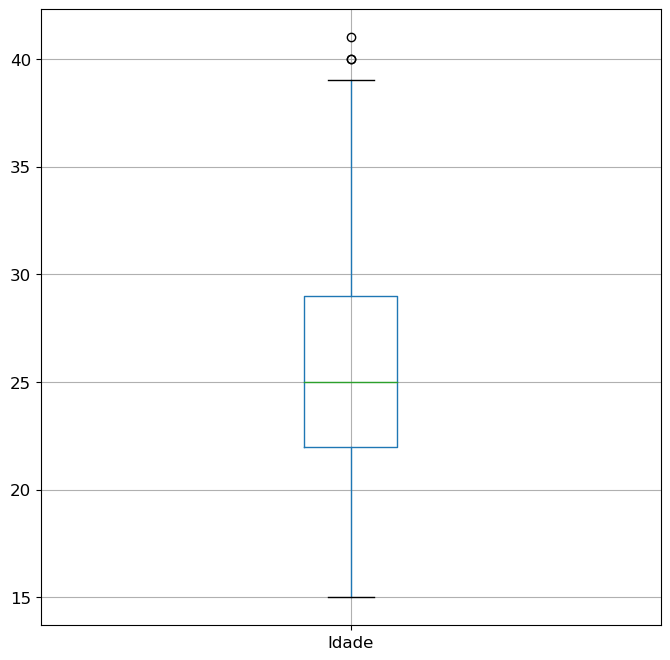

In [56]:
# Fazendo um boxplot para Idade para todos os Jogadores
df3_soccer.boxplot(column=['Idade'], fontsize='large', figsize=(8,8))

In [57]:
# desvio de Minutos jogados para todos os Jogadores
dv_Gols = df3_soccer['Minutos jogados'].apply(lambda x: x - media_Minutos_jogados)
print("Desvio de Minutos jogados:")
dv_Gols

Desvio de Minutos jogados:


0      -167.558144
1         3.069856
2      -106.930144
3      -168.930144
4      -166.600144
           ...    
2769   -137.930144
2770    255.069856
2771   -166.803144
2772   -168.564144
2773   -167.760144
Name: Minutos jogados, Length: 2774, dtype: float64

In [58]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Minutos jogados
desvio_absoluto_Minutos_jogados=df3_soccer['Minutos jogados'].mad()
print("Desvio Absoluto de Minutos jogados:",+ desvio_absoluto_Minutos_jogados)

variancia_Minutos_jogados=df3_soccer['Minutos jogados'].var()
print("Variância de Minutos jogados:",+ variancia_Minutos_jogados)

desvio_padrao_Minutos_jogados=df3_soccer['Minutos jogados'].std()
print("Desvio Padrão de Minutos jogados.:",+desvio_padrao_Minutos_jogados)

Desvio Absoluto de Minutos jogados: 220.3663419100734
Variância de Minutos jogados: 78159.0730642554
Desvio Padrão de Minutos jogados.: 279.5694422934227


C:\Users\user\AppData\Local\Temp\ipykernel_7232\1049550794.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Minutos_jogados=df3_soccer['Minutos jogados'].mad()


<Axes: >

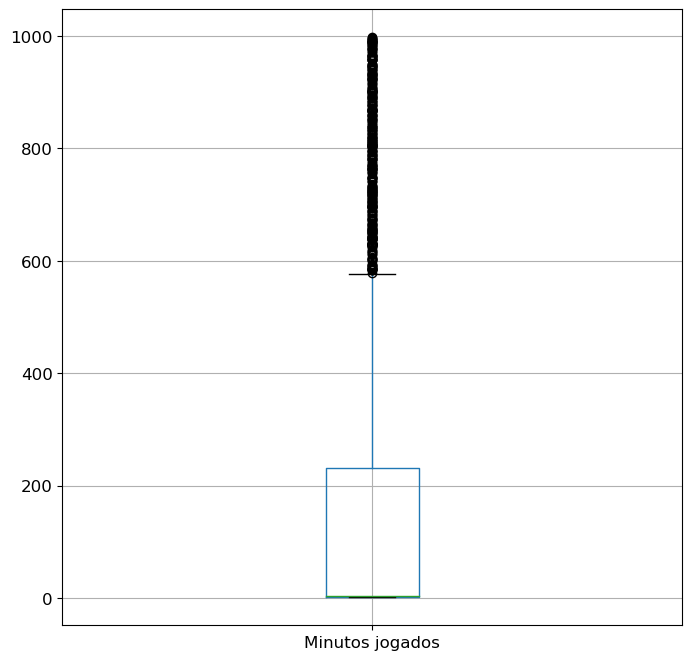

In [59]:
# Fazendo um boxplot para Minutos jogados para todos os Jogadores
df3_soccer.boxplot(column=['Minutos jogados'], fontsize='large', figsize=(8,8))

In [60]:
# desvio de Gols para todos os Jogadores
dv_Gols = df3_soccer['Gols'].apply(lambda x: x - media_Gols)
print("Desvio de Gols:")
dv_Gols

Desvio de Gols:


0       -1.181818
1       -2.181818
2       -2.181818
3       -2.181818
4       -1.181818
          ...    
2769    -2.181818
2770    -2.181818
2771    12.818182
2772    -1.181818
2773     0.818182
Name: Gols, Length: 2774, dtype: float64

In [61]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Gols
desvio_absoluto_gols=df3_soccer['Gols'].mad()
print("Desvio Absoluto de Gols:",+ desvio_absoluto_gols)

variancia_gols=df3_soccer['Gols'].var()
print("Variância de Gols:",+ variancia_gols)

desvio_padrao_gols=df3_soccer['Gols'].std()
print("Desvio Padrão de Gols.:",+desvio_padrao_gols)

Desvio Absoluto de Gols: 2.0149786694764287
Variância de Gols: 9.975771232070521
Desvio Padrão de Gols.: 3.158444432322741


C:\Users\user\AppData\Local\Temp\ipykernel_7232\4074109963.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_gols=df3_soccer['Gols'].mad()


<Axes: >

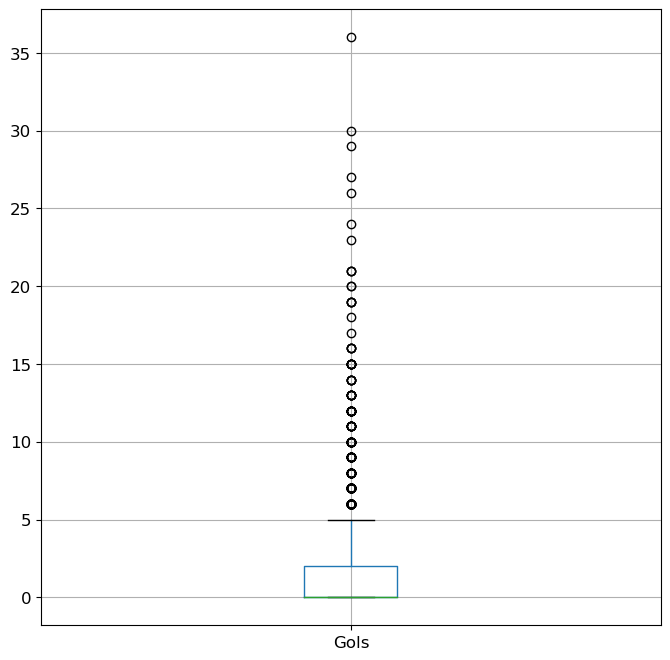

In [62]:
# Fazendo um boxplot para Gols para todos os Jogadores
df3_soccer.boxplot(column=['Gols'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Gols'}, xlabel='Posição'>

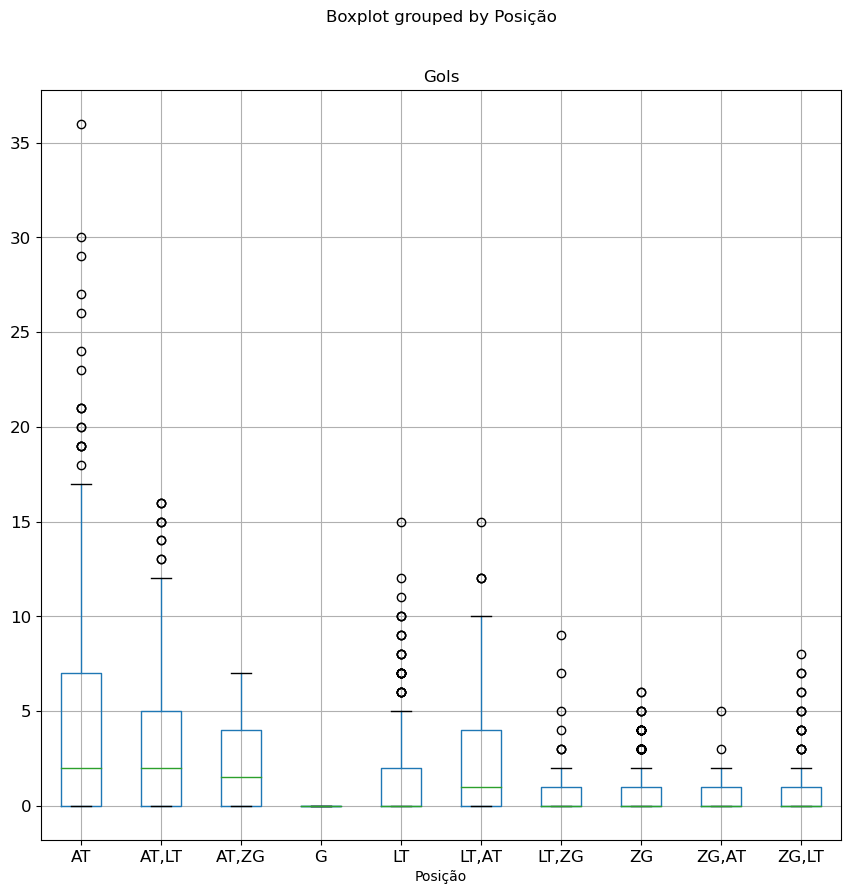

In [63]:
# Fazendo um boxplot para Gols por Posição
df3_soccer.boxplot(by='Posição', column=['Gols'], fontsize='large', figsize=(10,10))

In [64]:
# desvio de Assistências para todos os Jogadores
dv_Assistencias = df3_soccer['Assistências'].apply(lambda x: x - media_Assistencias)
print("Desvio de Assistências:")
dv_Assistencias

Desvio de Assistências:


0       1.909091
1      -1.090909
2      -1.090909
3      -1.090909
4       0.909091
          ...   
2769   -0.090909
2770   -1.090909
2771    5.909091
2772   -0.090909
2773   -1.090909
Name: Assistências, Length: 2774, dtype: float64

In [65]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Assistências
desvio_absoluto_Assistencia=df3_soccer['Assistências'].mad()
print("Desvio Absoluto de Assistências:",+ desvio_absoluto_Assistencia)

variancia_Assistencia=df3_soccer['Assistências'].var()
print("Variância de Assistências:",+ variancia_Assistencia)

desvio_padrao_Assistencia=df3_soccer['Assistências'].std()
print("Desvio Padrão de Assistências:",+ desvio_padrao_Assistencia)

Desvio Absoluto de Assistências: 1.3433694482029808
Variância de Assistências: 3.6337472189730264
Desvio Padrão de Assistências: 1.9062390246170668


C:\Users\user\AppData\Local\Temp\ipykernel_7232\2426850523.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Assistencia=df3_soccer['Assistências'].mad()


<Axes: >

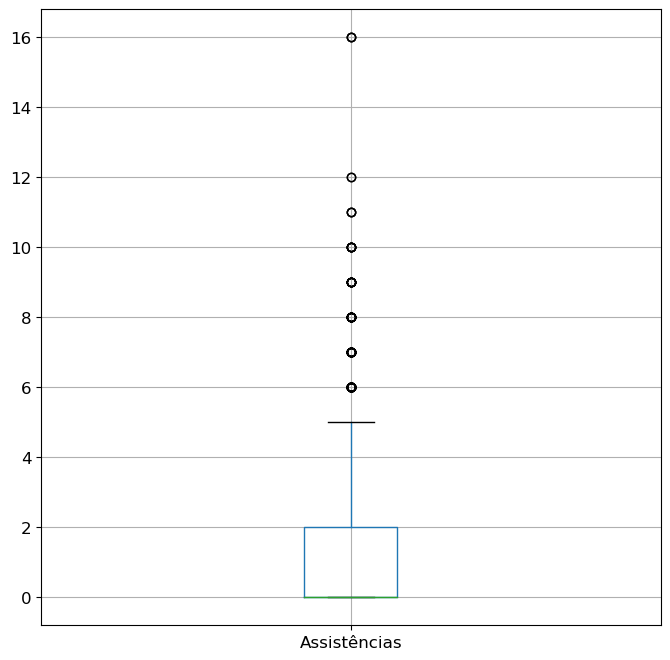

In [66]:
# Fazendo um boxplot para Assistências para todos os Jogadores
df3_soccer.boxplot(column=['Assistências'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Assistências'}, xlabel='Posição'>

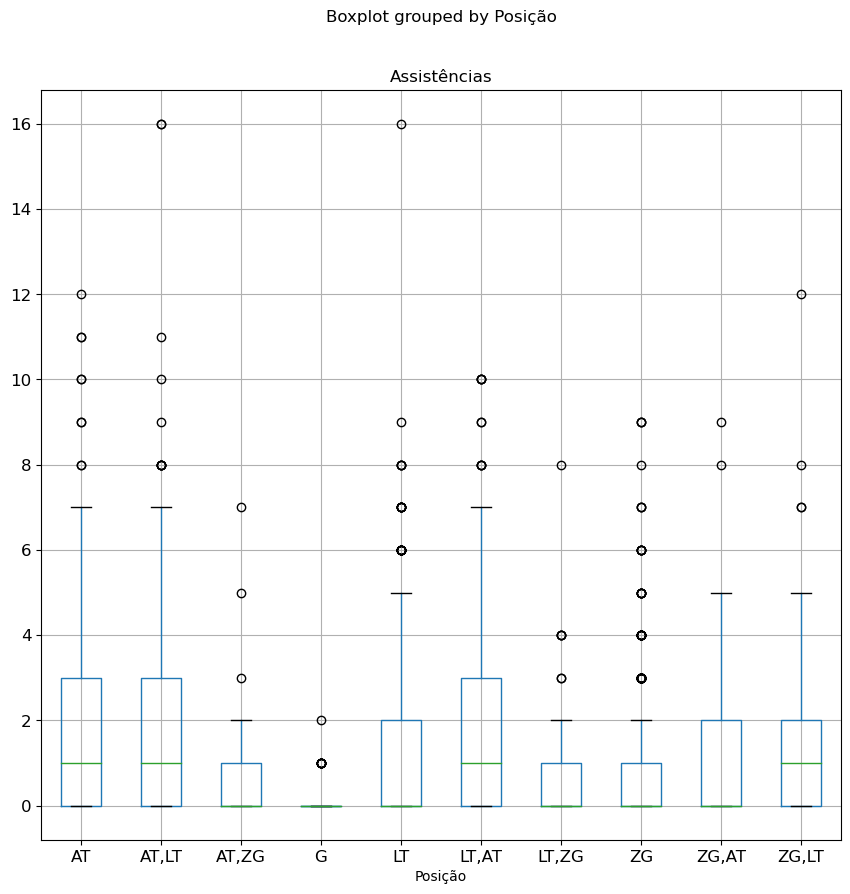

In [67]:
# Fazendo um boxplot para Assistências por Posição
df3_soccer.boxplot(by='Posição', column=['Assistências'], fontsize='large', figsize=(10,10))

In [68]:
# Desvio para Cartões Amarelos para todos os Jogadores
dv_Cartões_Amarelos = df3_soccer['Cartões Amarelos'].apply(lambda x: x - media_Cartões_Amarelos)
print("Desvio de Cartões Amarelos:")
dv_Cartões_Amarelos

Desvio de Cartões Amarelos:


0       0.227273
1      -0.772727
2      -1.772727
3      -1.772727
4       4.227273
          ...   
2769   -1.772727
2770   -0.772727
2771    2.227273
2772    1.227273
2773    7.227273
Name: Cartões Amarelos, Length: 2774, dtype: float64

In [69]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Cartões Amarelos
desvio_absoluto_Cartões_Amarelos=df3_soccer['Cartões Amarelos'].mad()
print("Desvio Absoluto de Cartões Amarelos:",+ desvio_absoluto_Cartões_Amarelos)

variancia_Cartões_Amarelos=df3_soccer['Cartões Amarelos'].var()
print("Variância de Cartões Amarelos:",+ variancia_Cartões_Amarelos)

desvio_padrao_Cartões_Amarelos=df3_soccer['Cartões Amarelos'].std()
print("Desvio Padrão de Cartões Amarelos:",+ desvio_padrao_Cartões_Amarelos)

Desvio Absoluto de Cartões Amarelos: 2.1721162987863925
Variância de Cartões Amarelos: 7.312872531525634
Desvio Padrão de Cartões Amarelos: 2.7042323368241927


C:\Users\user\AppData\Local\Temp\ipykernel_7232\1693690532.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Cartões_Amarelos=df3_soccer['Cartões Amarelos'].mad()


<Axes: >

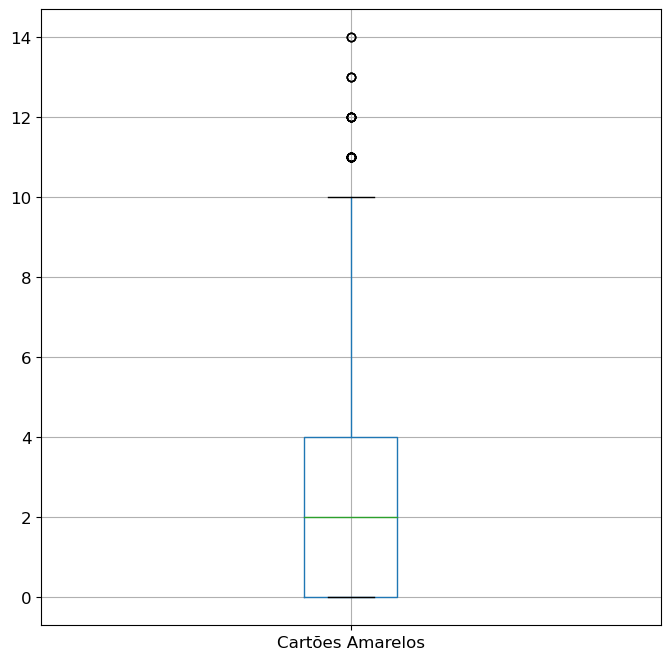

In [70]:
# Fazendo um boxplot para Cartões Amarelos para todos os Jogadores
df3_soccer.boxplot(column=['Cartões Amarelos'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Cartões Amarelos'}, xlabel='Posição'>

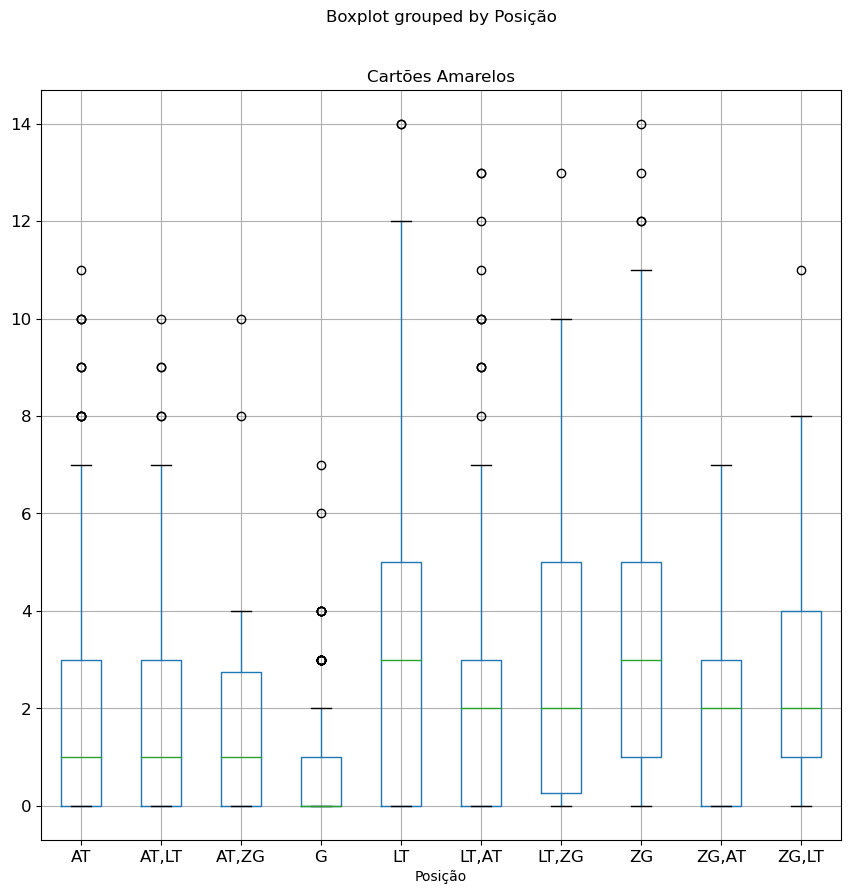

In [71]:
# Fazendo um boxplot para Cartões Amarelos por Posição
df3_soccer.boxplot(by='Posição', column=['Cartões Amarelos'], fontsize='large', figsize=(10,10))

In [72]:
# Desvio de Cartões Vermelhos para todos os jogadores
dv_Cartões_Vermelhos = df3_soccer['Cartões Vermelhos'].apply(lambda x: x - media_Cartões_Vermelhos)
print("Desvio de Cartões Vermelhos:")
dv_Cartões_Vermelhos

Desvio de Cartões Vermelhos:


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2769    0.0
2770    0.0
2771    0.0
2772    0.0
2773    0.0
Name: Cartões Vermelhos, Length: 2774, dtype: float64

In [73]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Cartões Vermelhos
desvio_absoluto_Cartões_Vermelhos=df3_soccer['Cartões Vermelhos'].mad()
print("Desvio Absoluto de Cartões Vermelhos:",+ desvio_absoluto_Cartões_Vermelhos)

variancia_Cartões_Vermelhos=df3_soccer['Cartões Vermelhos'].var()
print("Variância de Cartões Vermelhos:",+ variancia_Cartões_Vermelhos)

desvio_padrao_Cartões_Vermelhos=df3_soccer['Cartões Vermelhos'].std()
print("Desvio Padrão de Cartões Vermelhos:",+ desvio_padrao_Cartões_Vermelhos)

Desvio Absoluto de Cartões Vermelhos: 0.22771445012368943
Variância de Cartões Vermelhos: 0.1534688835669675
Desvio Padrão de Cartões Vermelhos: 0.39175104794622756


C:\Users\user\AppData\Local\Temp\ipykernel_7232\1585014853.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Cartões_Vermelhos=df3_soccer['Cartões Vermelhos'].mad()


<Axes: >

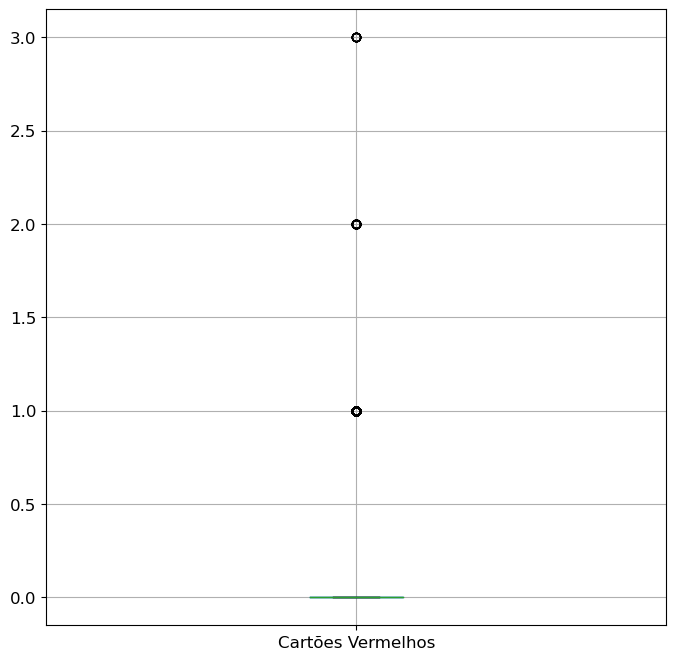

In [74]:
# Fazendo um boxplot para Cartões Vermelhos para todos os Jogadores
df3_soccer.boxplot(column=['Cartões Vermelhos'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Cartões Vermelhos'}, xlabel='Posição'>

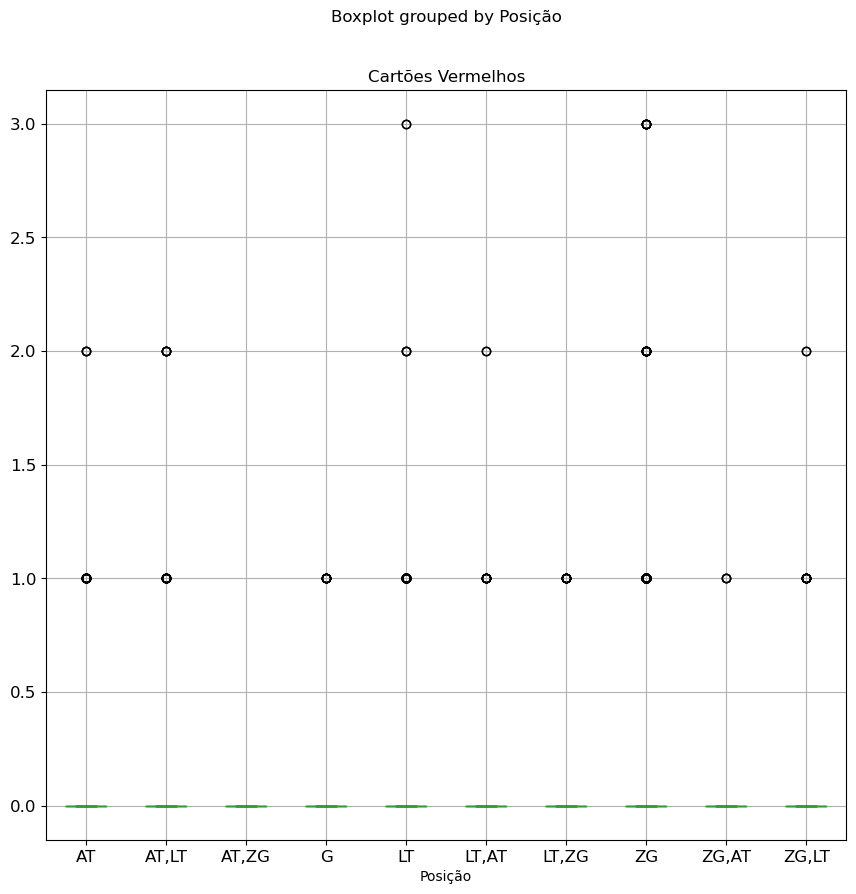

In [75]:
# Fazendo um boxplot para Cartões Vermelhos Recebidos por Posição
df3_soccer.boxplot(by='Posição', column=['Cartões Vermelhos'], fontsize='large', figsize=(10,10))

In [76]:
# Desvio de Carregada Progressiva para todos os Jogadores
dv_Carregada_Progressiva = df3_soccer['Carregada Progressiva'].apply(lambda x: x - media_Carregada_Progressiva)
print("Desvio de Carregada Progressiva:")
dv_Carregada_Progressiva

Desvio de Carregada Progressiva:


0       15.954545
1      -19.045455
2      -27.045455
3      -27.045455
4       12.954545
          ...    
2769   -24.045455
2770   -18.045455
2771    55.954545
2772   -25.045455
2773    11.954545
Name: Carregada Progressiva, Length: 2774, dtype: float64

In [77]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Carregada Progressiva
desvio_absoluto_Carregada_Progressiva=df3_soccer['Carregada Progressiva'].mad()
print("Desvio Absoluto de Carregada Progressiva:",+ desvio_absoluto_Carregada_Progressiva)

variancia_Carregada_Progressiva=df3_soccer['Carregada Progressiva'].var()
print("Variância de Carregada Progressiva:",+ variancia_Carregada_Progressiva)

desvio_padrao_Carregada_Progressiva=df3_soccer['Carregada Progressiva'].std()
print("Desvio Padrão de Carregada Progressiva:",+ desvio_padrao_Carregada_Progressiva)

Desvio Absoluto de Carregada Progressiva: 19.528242476097706
Variância de Carregada Progressiva: 691.6699428857528
Desvio Padrão de Carregada Progressiva: 26.299618683276623


C:\Users\user\AppData\Local\Temp\ipykernel_7232\3336668624.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Carregada_Progressiva=df3_soccer['Carregada Progressiva'].mad()


<Axes: >

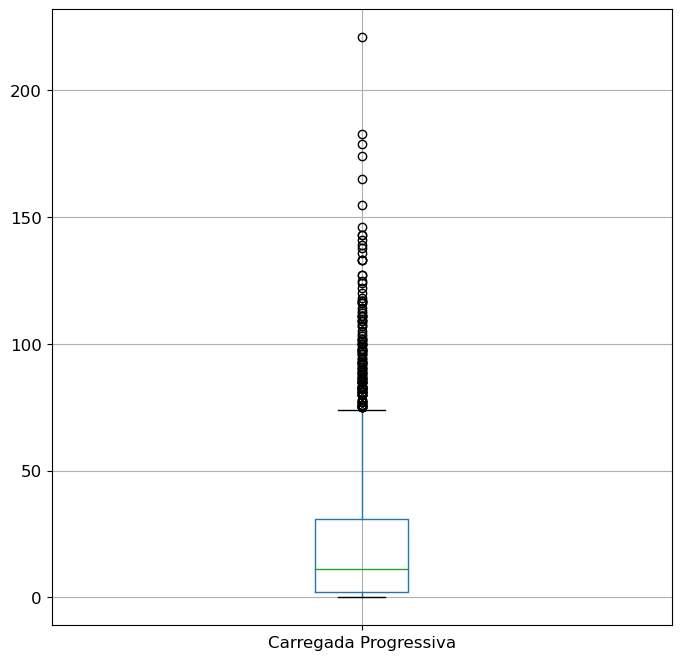

In [78]:
# Fazendo um boxplot para Carregada Progressiva para todos os Jogadores
df3_soccer.boxplot(column=['Carregada Progressiva'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Carregada Progressiva'}, xlabel='Posição'>

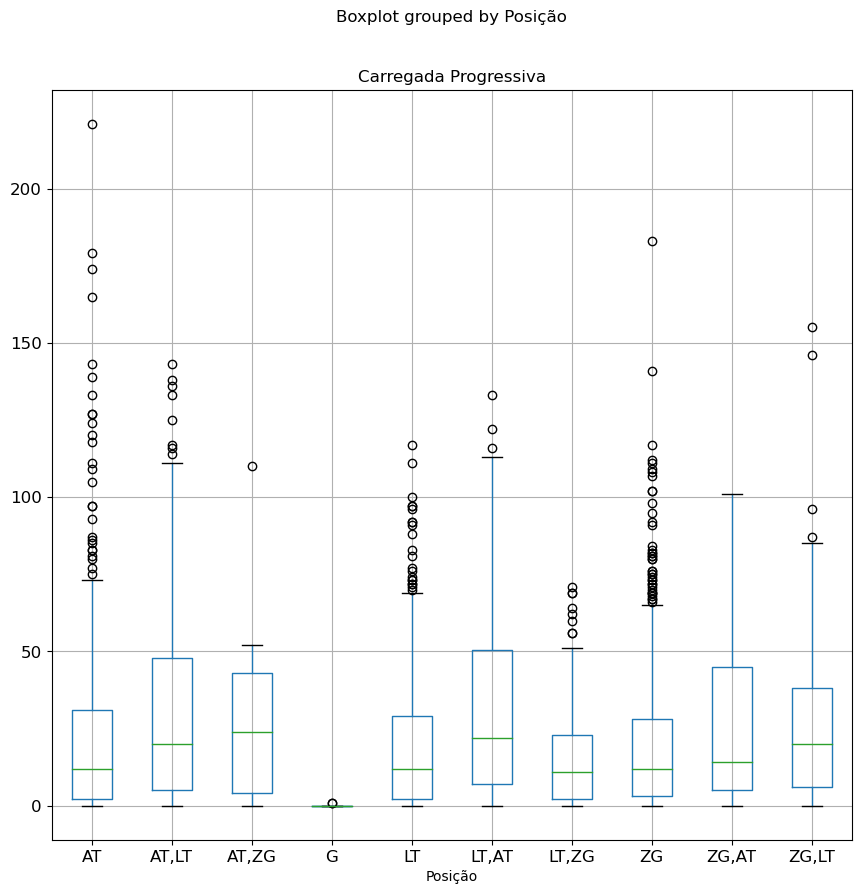

In [79]:
# Fazendo um boxplot para Carregada Progressiva por Posição
df3_soccer.boxplot(by='Posição', column=['Carregada Progressiva'], fontsize='large', figsize=(10,10))

In [80]:
# Desvio de Passes Progressivos para todos os Jogadores
dv_Passes_Progressivos = df3_soccer['Passes Progressivos'].apply(lambda x: x - media_Passes_Progressivos)
print("Desvio de Passes Progressivos:")
dv_Passes_Progressivos

Desvio de Passes Progressivos:


0        55.818182
1       -24.181818
2       -30.181818
3       -30.181818
4       184.818182
           ...    
2769    -29.181818
2770    -20.181818
2771    235.818182
2772     -1.181818
2773     46.818182
Name: Passes Progressivos, Length: 2774, dtype: float64

In [81]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Passes Progressivos
desvio_absoluto_Passes_Progressivos=df3_soccer['Passes Progressivos'].mad()
print("Desvio Absoluto de Passes Progressivos:",+ desvio_absoluto_Passes_Progressivos)

variancia_Passes_Progressivos=df3_soccer['Passes Progressivos'].var()
print("Variância de Passes Progressivos:",+ variancia_Passes_Progressivos)

desvio_padrao_Passes_Progressivos=df3_soccer['Passes Progressivos'].std()
print("Desvio Padrão de Passes Progressivos:",+ desvio_padrao_Passes_Progressivos)

Desvio Absoluto de Passes Progressivos: 40.65168739074182
Variância de Passes Progressivos: 2757.3614650075215
Desvio Padrão de Passes Progressivos: 52.51058431409349


C:\Users\user\AppData\Local\Temp\ipykernel_7232\3403940705.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Passes_Progressivos=df3_soccer['Passes Progressivos'].mad()


<Axes: >

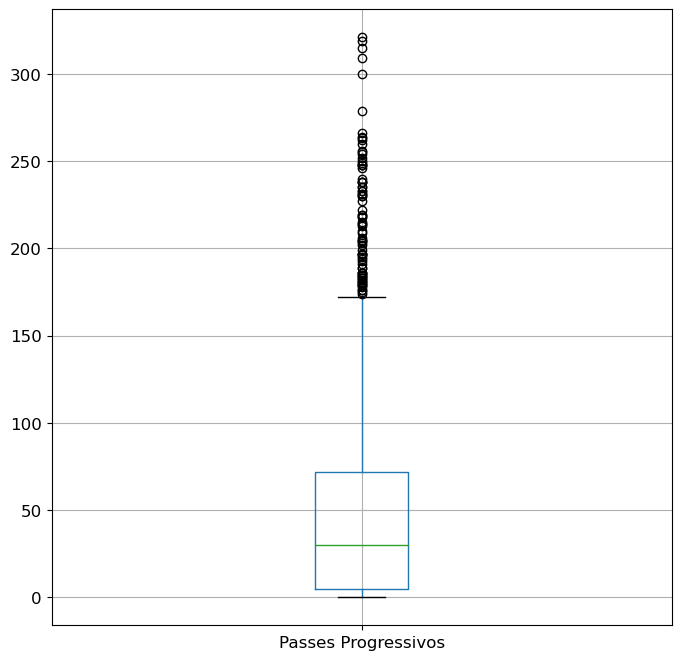

In [82]:
# Fazendo um boxplot para Passes Progressivos para todos os Jogadores
df3_soccer.boxplot(column=['Passes Progressivos'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Passes Progressivos'}, xlabel='Posição'>

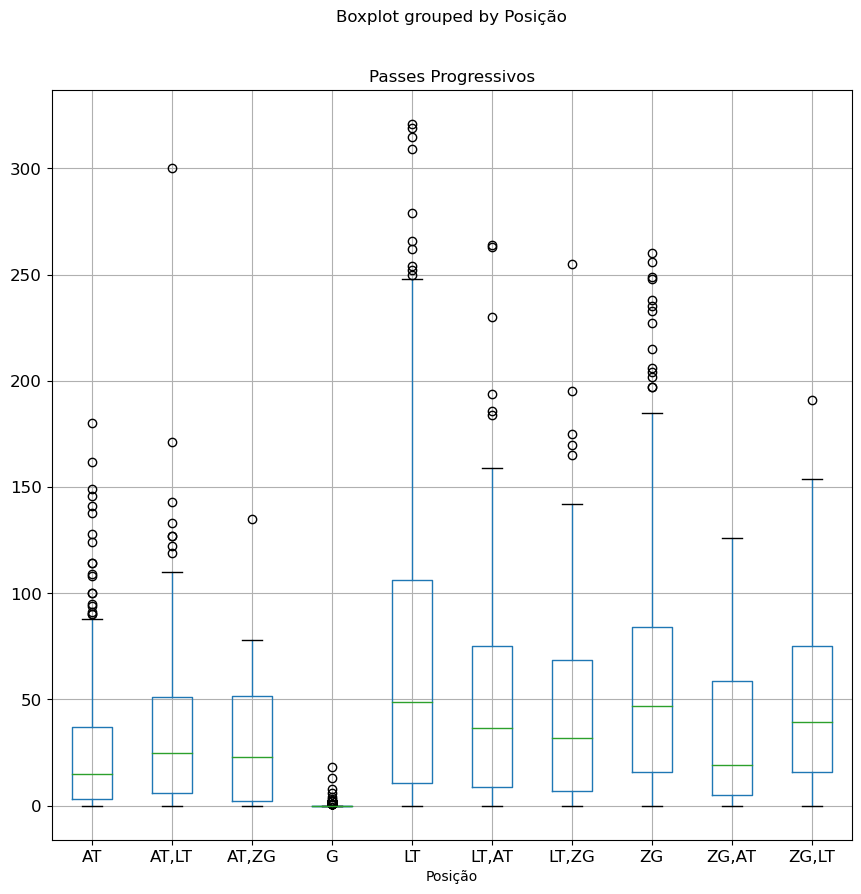

In [83]:
# Fazendo um boxplot para Passes Progressivos por Posição
df3_soccer.boxplot(by='Posição', column=['Passes Progressivos'], fontsize='large', figsize=(10,10))

In [84]:
# Desvio de Passes Progressivos Recebidos para todos os Jogadores
dv_Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos'].apply(lambda x: x - media_Passes_Progressivos_Recebidos)
print("Desvio de Passes Progressivos Recebidos:")
dv_Passes_Progressivos_Recebidos

Desvio de Passes Progressivos Recebidos:


0        68.590909
1       -67.409091
2       -82.409091
3       -82.409091
4       -72.409091
           ...    
2769    -78.409091
2770    -72.409091
2771    110.590909
2772    -10.409091
2773      0.590909
Name: Passes Progressivos Recebidos, Length: 2774, dtype: float64

In [85]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Passes Progressivos Recebidos
desvio_absoluto_Passes_Progressivos_Recebidos=df3_soccer['Passes Progressivos Recebidos'].mad()
print("Desvio Absoluto de Passes Progressivos Recebidos:",+ desvio_absoluto_Passes_Progressivos_Recebidos)

variancia_Passes_Progressivos_Recebidos=df3_soccer['Passes Progressivos Recebidos'].var()
print("Variância de Passes Progressivos Recebidos:",+ variancia_Passes_Progressivos_Recebidos)

desvio_padrao_Passes_Progressivos_Recebidos=df3_soccer['Passes Progressivos'].std()
print("Desvio Padrão de Passes Progressivos Recebidos:",+ desvio_padrao_Passes_Progressivos_Recebidos)

Desvio Absoluto de Passes Progressivos Recebidos: 46.512012097086505
Variância de Passes Progressivos Recebidos: 3851.783415809733
Desvio Padrão de Passes Progressivos Recebidos: 52.51058431409349


C:\Users\user\AppData\Local\Temp\ipykernel_7232\2762446694.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Passes_Progressivos_Recebidos=df3_soccer['Passes Progressivos Recebidos'].mad()


<Axes: >

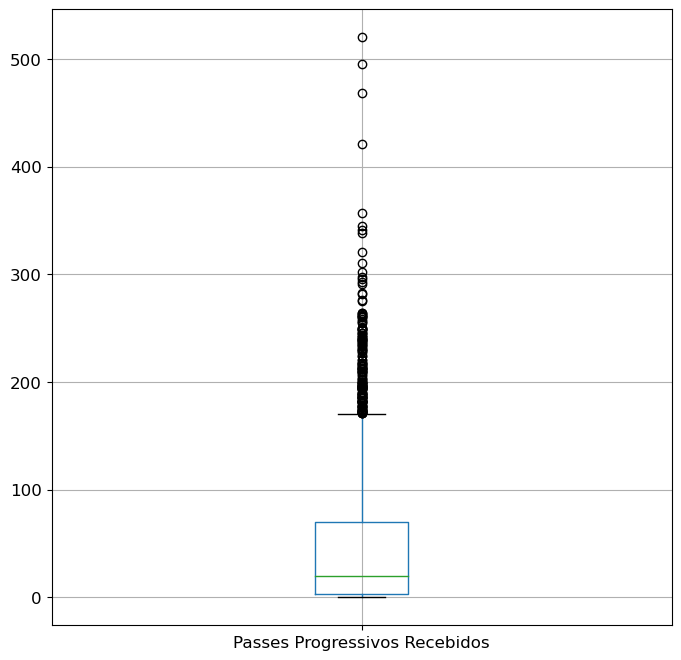

In [86]:
# Fazendo um boxplot para Passes Progressivos Recebidos de todos os jogadores
df3_soccer.boxplot(column=['Passes Progressivos Recebidos'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Passes Progressivos Recebidos'}, xlabel='Posição'>

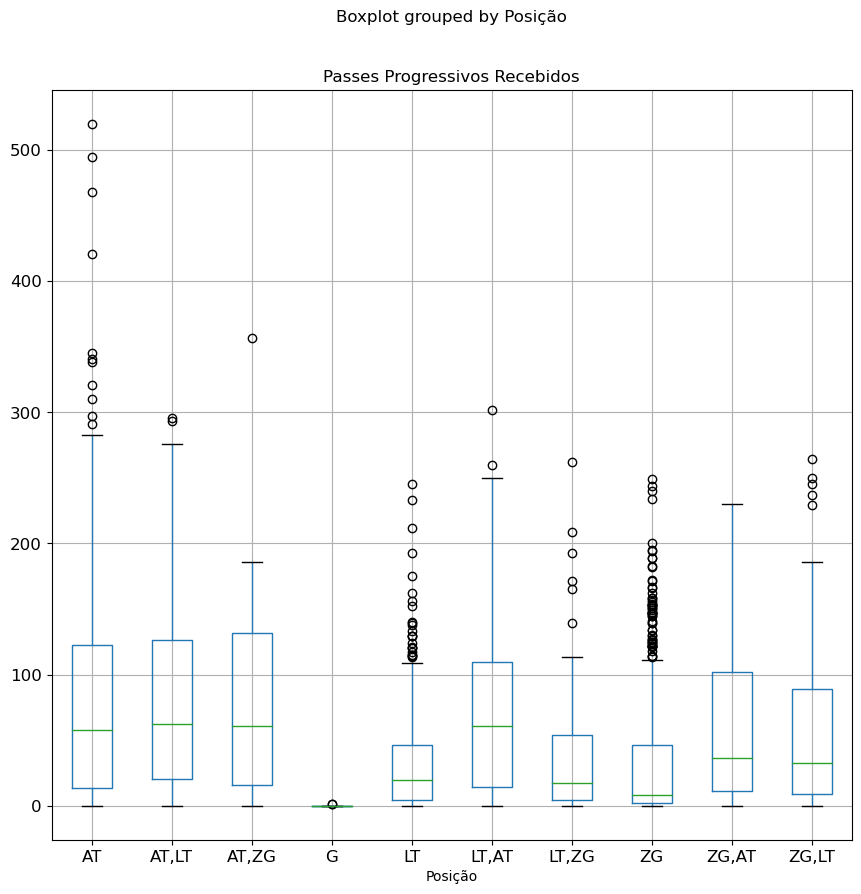

In [87]:
# Fazendo um boxplot para Passes Progressivos Recebidos por Posição
df3_soccer.boxplot(by='Posição', column=['Passes Progressivos Recebidos'], fontsize='large', figsize=(10,10))

## TABELA DE HISTOGRAMA 

Tabela de Histograma para Idade , Minutos jogados, Gols, Assistências , Cartões Amarelos , Cartões Vermelhos, Carregadas Progressivas , Passes Progressivos , Passes Progressivos Recebidos. K será Calculado usando a Regra de Sturges.

## K SENDO CALCULADO k = [1 + 3,3 log10(tamanho_do_dataset)]

In [88]:
# K SENDO CALCULADO k = [1 + 3,3 log10(tamanho_do_dataset)]
k = math.ceil(1 + 3.3 * math.log10(df3_soccer.size))
print(k)

18


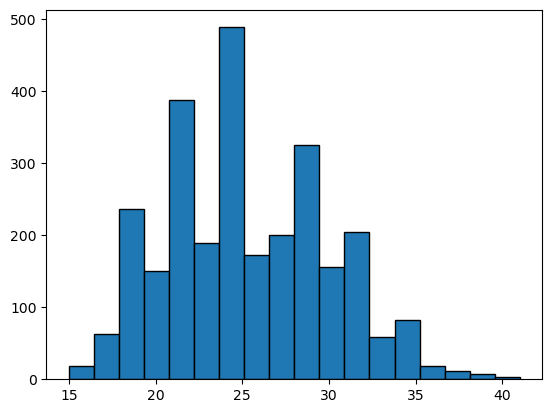

In [89]:
# Histograma de Idade para todos os Jogadores
plt.hist(df3_soccer['Idade'], bins=k,edgecolor='black' )
plt.show()

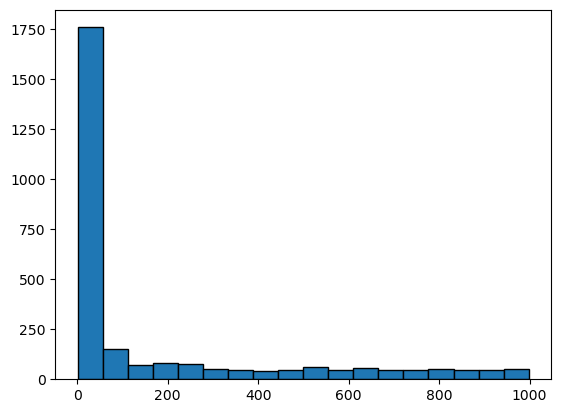

In [90]:
# Histograma de Minutos jogados para todos os Jogadores
plt.hist(df3_soccer['Minutos jogados'], bins=k,edgecolor='black' )
plt.show()

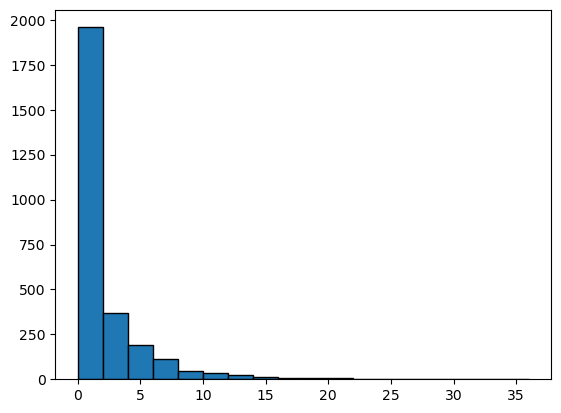

In [91]:
# Histograma de Gols para todos os Jogadores
plt.hist(df3_soccer['Gols'], bins=k,edgecolor='black' )
plt.show()

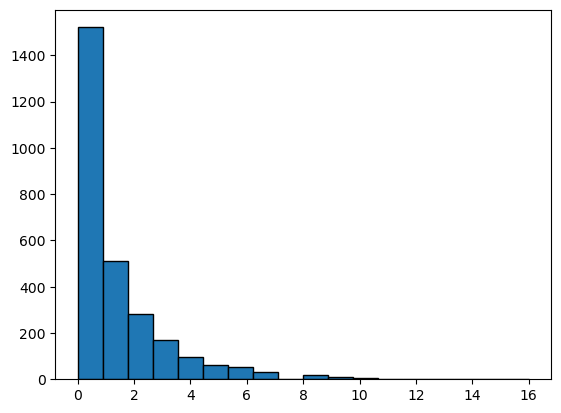

In [92]:
# Histograma de Assistências para todos os Jogadores
plt.hist(df3_soccer['Assistências'], bins=k,edgecolor='black' )
plt.show()

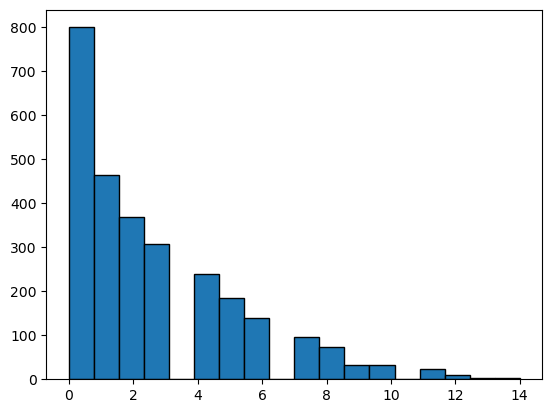

In [93]:
# Histograma de Cartões Amarelos para todos os Jogadores
plt.hist(df3_soccer['Cartões Amarelos'], bins=k,edgecolor='black' )
plt.show()

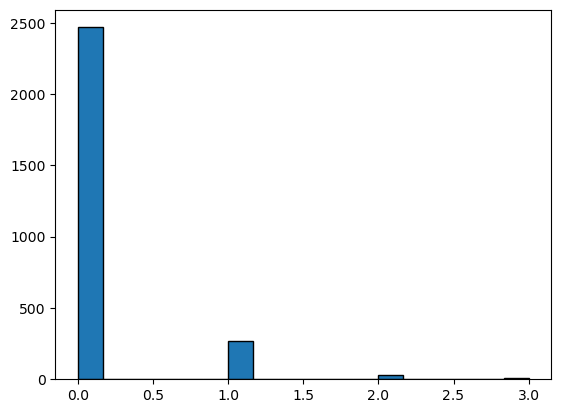

In [94]:
# Histograma de Cartões Vermelhos para todos os Jogadores
plt.hist(df3_soccer['Cartões Vermelhos'], bins=k,edgecolor='black' )
plt.show()

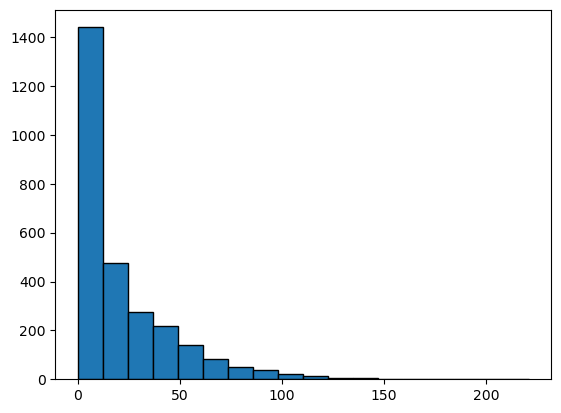

In [95]:
# Histograma de Carregadas Progressivas para todos os Jogadores
plt.hist(df3_soccer['Carregada Progressiva'], bins=k,edgecolor='black' )
plt.show()

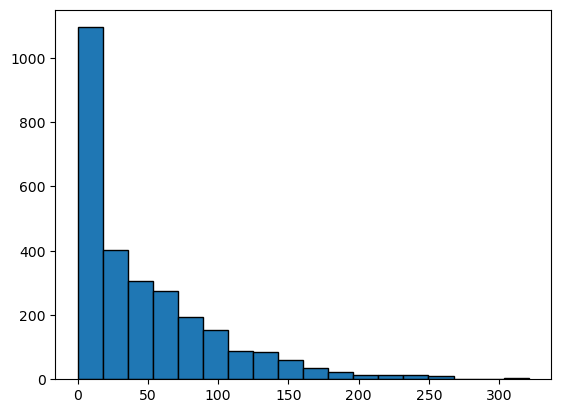

In [96]:
# Histograma de Passes Progressivos para todos os Jogadores
plt.hist(df3_soccer['Passes Progressivos'], bins=k,edgecolor='black' )
plt.show()

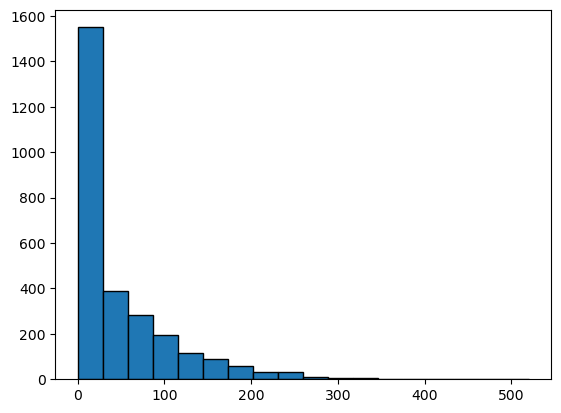

In [97]:
# Histograma de Passes Progressivos Recebidos para todos os Jogadores
plt.hist(df3_soccer['Passes Progressivos Recebidos'], bins=k,edgecolor='black' )
plt.show()

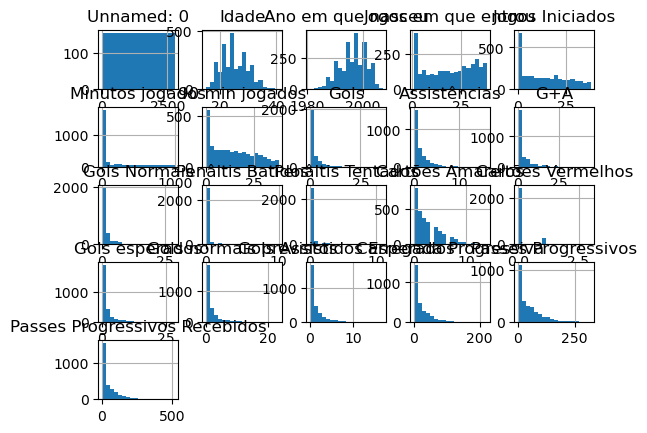

In [98]:
hist = df3_soccer.hist(bins=k)

## TABELA DE FREQUÊNCIA DE DADOS NÂO AGRUPADOS

Vou fazer a tabela de Frequência para posição , Nacionalidade , Liga e depois para Idade, Gols, Assistências , Cartões 
Amarelos e Cartões Vermelhos. 

In [99]:
# tabela de Frequência para a Nacionalidade dos Jogadores
# Calcular a quantidade exata de jogadores de cada Nacionalidade
freq_table = pd.crosstab(df3_soccer['Nacionalidade'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Nacionalidade,,,,
ALB,12,0.004326,0.432588,0.432588
ALG,29,0.010454,1.045422,1.478010
ANG,2,0.000721,0.072098,1.550108
ARG,79,0.028479,2.847873,4.397981
ARM,2,0.000721,0.072098,4.470079
...,...,...,...,...
ZIM,3,0.001081,0.108147,91.131939
ENG,198,0.071377,7.137707,98.269647
NIR,4,0.001442,0.144196,98.413843


In [100]:
# tabela de Frequência para a Posição dos Jogadores
# Calcular a quantidade exata de jogadores de  cada Posição
freq_table = pd.crosstab(df3_soccer['Posição'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Posição,,,,
AT,364,0.131218,13.121846,13.121846
"AT,LT",300,0.108147,10.814708,23.936554
"AT,ZG",22,0.007931,0.793079,24.729632
G,203,0.073180,7.317952,32.047585
LT,600,0.216294,21.629416,53.677001
"LT,AT",232,0.083634,8.363374,62.040375
"LT,ZG",62,0.022350,2.235040,64.275415
ZG,850,0.306417,30.641673,94.917087
"ZG,AT",39,0.014059,1.405912,96.322999


In [101]:
# tabela de Frequência para a Liga dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Liga'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Liga,,,,
Bundesliga,511,0.184211,18.421053,18.421053
La Liga,540,0.194665,19.466474,37.887527
Ligue 1,591,0.213050,21.304975,59.192502
Serie A,586,0.211247,21.124730,80.317231
Premier League,546,0.196828,19.682769,100.000000


In [102]:
# tabela de Frequência para a Idade dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Idade'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Idade,,,,
15,2,0.000721,0.072098,0.072098
16,17,0.006128,0.612833,0.684932
17,63,0.022711,2.271089,2.956020
18,102,0.036770,3.677001,6.633021
19,134,0.048306,4.830570,11.463590
20,150,0.054074,5.407354,16.870944
21,180,0.064888,6.488825,23.359769
22,208,0.074982,7.498198,30.857967
23,190,0.068493,6.849315,37.707282


In [103]:
# tabela de Frequência para a Gols dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Gols'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Gols,,,,
0,1465,0.528118,52.811824,52.811824
1,494,0.178082,17.808219,70.620043
2,229,0.082552,8.255227,78.875270
3,142,0.051190,5.118962,83.994232
4,117,0.042177,4.217736,88.211968
5,76,0.027397,2.739726,90.951694
6,63,0.022711,2.271089,93.222783
7,48,0.017304,1.730353,94.953136
8,23,0.008291,0.829128,95.782264


In [104]:
# tabela de Frequência para a Assistências dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Assistências'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Assistências,,,,
0,1521,0.548306,54.830570,54.830570
1,512,0.184571,18.457102,73.287671
2,284,0.102379,10.237924,83.525595
3,169,0.060923,6.092286,89.617880
4,98,0.035328,3.532805,93.150685
5,63,0.022711,2.271089,95.421774
6,52,0.018745,1.874549,97.296323
7,30,0.010815,1.081471,98.377794
8,20,0.007210,0.720981,99.098774


In [105]:
# tabela de Frequência para a Cartões Amarelos dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Cartões Amarelos'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Cartões Amarelos,,,,
0,799,0.288032,28.803172,28.803172
1,464,0.167267,16.726748,45.529921
2,369,0.133021,13.302091,58.832012
3,308,0.111031,11.103100,69.935112
4,238,0.085797,8.579668,78.514780
5,184,0.066330,6.633021,85.147801
6,138,0.049748,4.974766,90.122567
7,96,0.034607,3.460707,93.583273
8,73,0.026316,2.631579,96.214852


In [106]:
# tabela de Frequência para a Cartões Vermelhos dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Cartões Vermelhos'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Cartões Vermelhos,,,,
0,2468,0.889690,88.968998,88.968998
1,266,0.095890,9.589041,98.558039
2,31,0.011175,1.117520,99.675559
3,9,0.003244,0.324441,100.000000


In [107]:
# tabela de Frequência para a Carregada Progressiva dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Carregada Progressiva'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Carregada Progressiva,,,,
0.0,478,0.172314,17.231435,17.231435
1.0,154,0.055516,5.551550,22.782985
2.0,127,0.045782,4.578226,27.361211
3.0,95,0.034247,3.424658,30.785869
4.0,93,0.033526,3.352559,34.138428
...,...,...,...,...
165.0,1,0.000360,0.036049,99.855804
174.0,1,0.000360,0.036049,99.891853
179.0,1,0.000360,0.036049,99.927902


In [108]:
# tabela de Frequência para a Passes Progressivos dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Passes Progressivos'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Passes Progressivos,,,,
0.0,353,0.127253,12.725306,12.725306
1.0,134,0.048306,4.830570,17.555876
2.0,77,0.027758,2.775775,20.331651
3.0,52,0.018745,1.874549,22.206200
4.0,65,0.023432,2.343187,24.549387
...,...,...,...,...
300.0,1,0.000360,0.036049,99.855804
309.0,1,0.000360,0.036049,99.891853
315.0,1,0.000360,0.036049,99.927902


In [109]:
# tabela de Frequência para a Passes Progressivos Recebidos dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Passes Progressivos Recebidos'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Passes Progressivos Recebidos,,,,
0.0,435,0.156813,15.681327,15.681327
1.0,137,0.049387,4.938717,20.620043
2.0,111,0.040014,4.001442,24.621485
3.0,94,0.033886,3.388609,28.010094
4.0,84,0.030281,3.028118,31.038212
...,...,...,...,...
357.0,1,0.000360,0.036049,99.855804
421.0,1,0.000360,0.036049,99.891853
468.0,1,0.000360,0.036049,99.927902


## QQ-PLOT

Vou fazer o QQ-PLOT para Idade, Minutos jogados, Gols, Assistência , Cartões Amarelos , Cartões Vermelhos, 
Carregadas Progressivas , passes Progressivos , Passes Progressivos Recebidos e Jogos em que entrou.

In [110]:
import statsmodels.api as sm

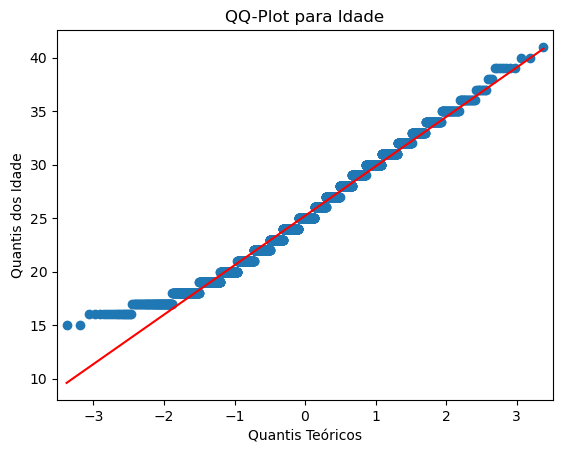

In [111]:
# Selecionar a coluna de Idade do DataFrame
idade = df3_soccer['Idade']

# Criar o QQ-Plot
sm.qqplot(idade, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Idade')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Idade')

# Exibir o gráfico
plt.show()

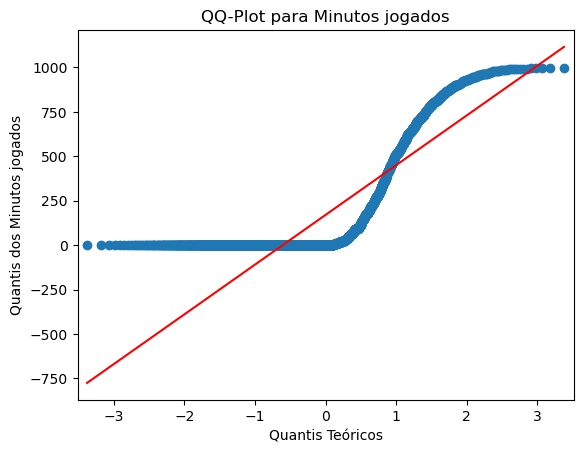

In [112]:
# Selecionar a coluna de gols do DataFrame
minutos_jogados = df3_soccer['Minutos jogados']

# Criar o QQ-Plot
sm.qqplot(minutos_jogados, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Minutos jogados')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Minutos jogados')

# Exibir o gráfico
plt.show()

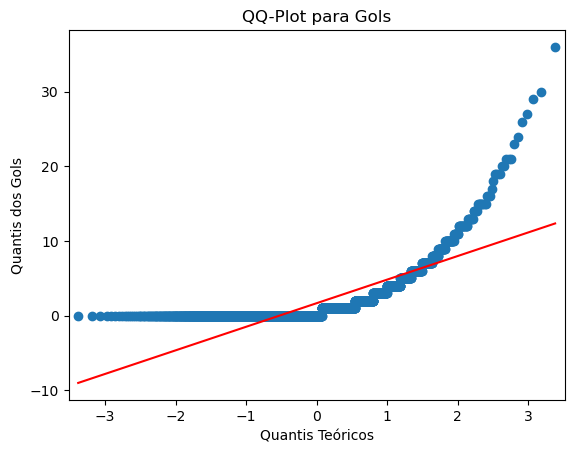

In [113]:
# Selecionar a coluna de Gols do DataFrame
x = df3_soccer['Gols']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Gols')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Gols')

# Exibir o gráfico
plt.show()

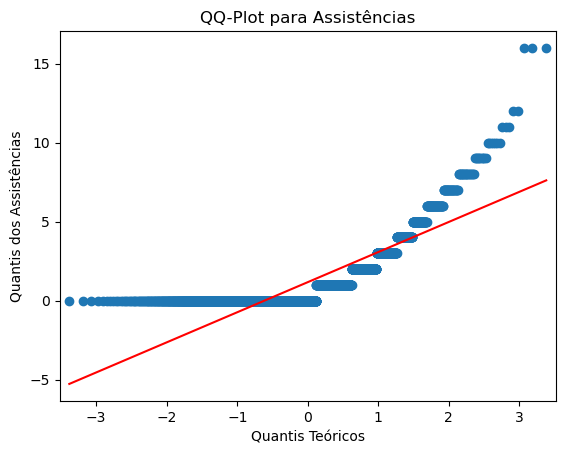

In [114]:
# Selecionar a coluna de Assistências do DataFrame
x = df3_soccer['Assistências']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Assistências')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Assistências')

# Exibir o gráfico
plt.show()

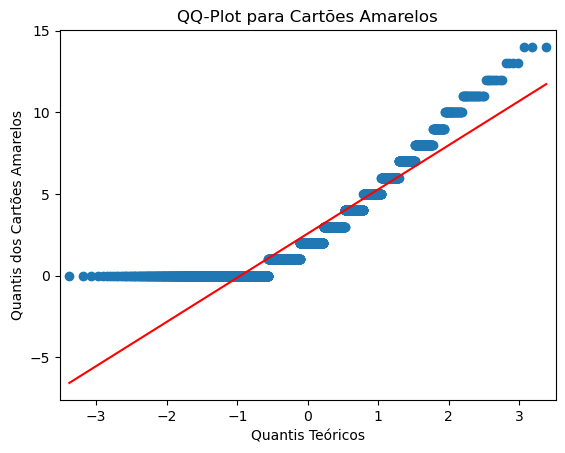

In [115]:
# Selecionar a coluna de Cartões Amarelos do DataFrame
x = df3_soccer['Cartões Amarelos']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Cartões Amarelos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Cartões Amarelos')

# Exibir o gráfico
plt.show()

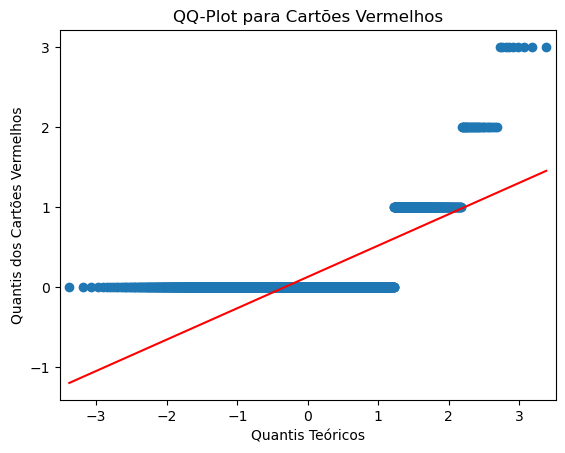

In [116]:
# Selecionar a coluna de Cartões Vermelhos do DataFrame
x = df3_soccer['Cartões Vermelhos']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Cartões Vermelhos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Cartões Vermelhos')

# Exibir o gráfico
plt.show()

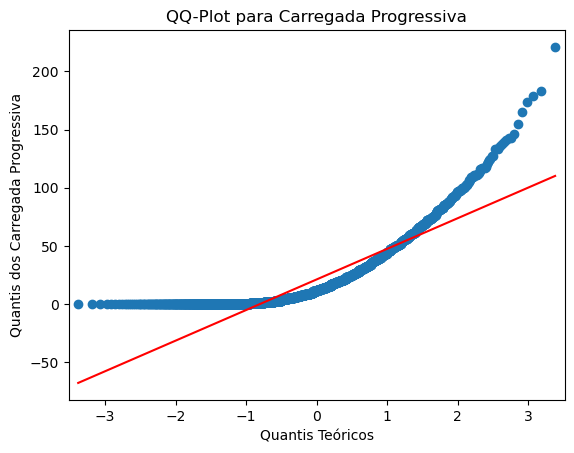

In [117]:
# Selecionar a coluna de Carregada Progressiva do DataFrame
x = df3_soccer['Carregada Progressiva']

# Criar o QQ-Plot
sm.qqplot( x , marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Carregada Progressiva')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Carregada Progressiva')

# Exibir o gráfico
plt.show()

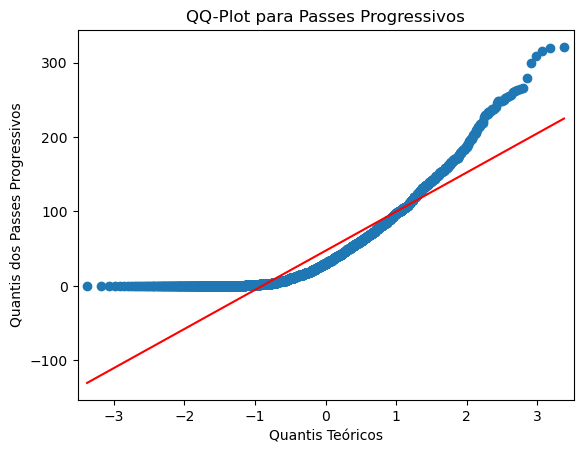

In [118]:
# Selecionar a coluna de Passes Progressivos do DataFrame
x = df3_soccer['Passes Progressivos']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Passes Progressivos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Passes Progressivos')

# Exibir o gráfico
plt.show()

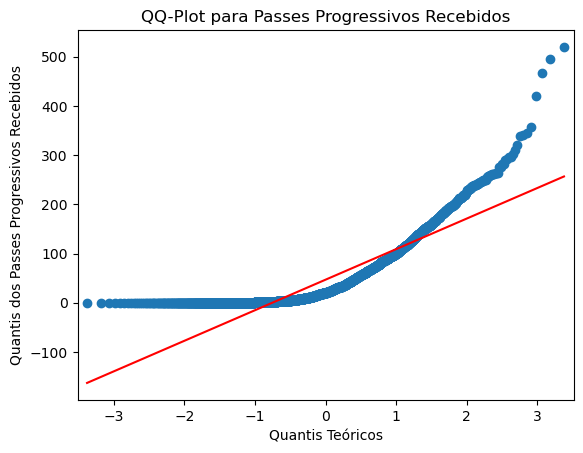

In [119]:
# Selecionar a coluna de Passes Progressivos Recebidos do DataFrame
x = df3_soccer['Passes Progressivos Recebidos']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Passes Progressivos Recebidos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Passes Progressivos Recebidos')

# Exibir o gráfico
plt.show()

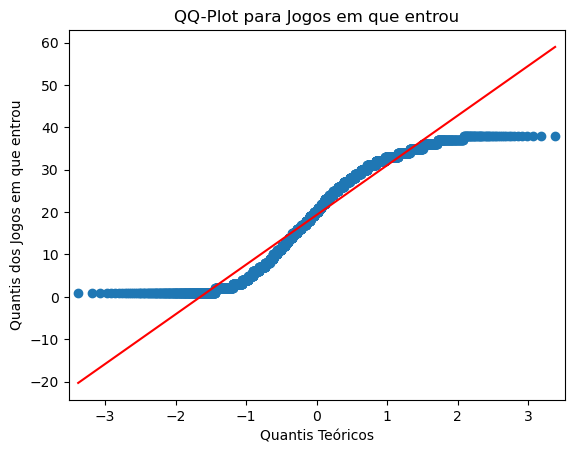

In [120]:
df3_soccer['Jogos em que entrou'] = pd.to_numeric(df3_soccer['Jogos em que entrou'], errors='coerce')
# Selecionar a coluna de Jogos em que entrou do DataFrame
x = df3_soccer['Jogos em que entrou']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Jogos em que entrou')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Jogos em que entrou')

# Exibir o gráfico
plt.show()

## CORRELAÇÔES 

Vou fazer Correlações para Idade e algumas colunas e depois irei fazer a correlação entre gols, assistências e Passes 
Progressivos e Passes Progressivos Recebidos.
Também irei fazer entre Minutos jogados e outras colunas.

Correlação entre idade e gols: 0.0787444891605889


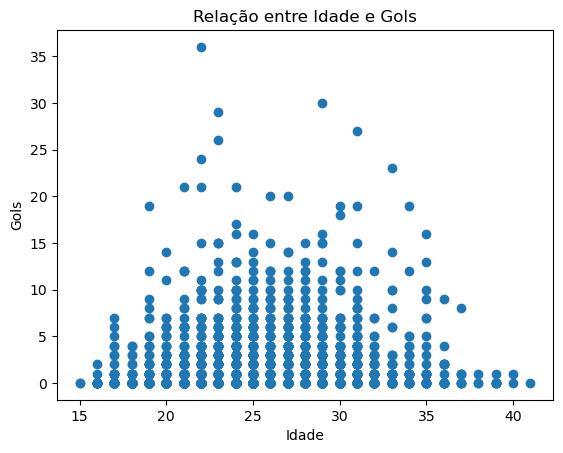

In [121]:
# Correlação entre Idade e Gols
Correlação_Idade_Goals = df3_soccer['Idade'].corr(df3_soccer['Gols'])
print("Correlação entre idade e gols:", Correlação_Idade_Goals)

idade = df3_soccer['Idade']
gols = df3_soccer['Gols']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Gols')
plt.title('Relação entre Idade e Gols')
plt.show()

Correlação entre idade e Assistências: 0.06777650946078913


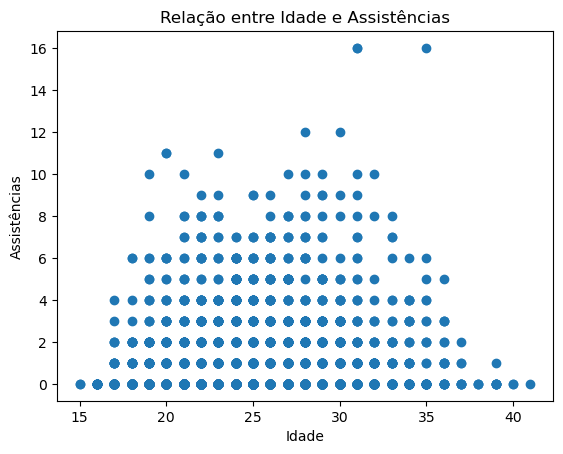

In [122]:
# Correlação entre Idade e Assistências
Correlação_Idade_Assistências = df3_soccer['Idade'].corr(df3_soccer['Assistências'])
print("Correlação entre idade e Assistências:", Correlação_Idade_Assistências)
idade = df3_soccer['Idade']
gols = df3_soccer['Assistências']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Assistências')
plt.title('Relação entre Idade e Assistências')
plt.show()

Correlação entre idade e Minutos jogados: -0.005876610229696836


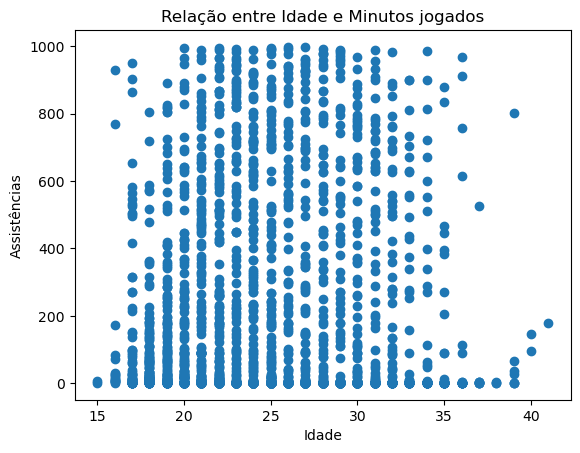

In [123]:
# Correlação entre Idade e Minutos Jogados
Correlação_Idade_Minutos_Jogados = df3_soccer['Idade'].corr(df3_soccer['Minutos jogados'])
print("Correlação entre idade e Minutos jogados:", Correlação_Idade_Minutos_Jogados)
idade = df3_soccer['Idade']
gols = df3_soccer['Minutos jogados']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Assistências')
plt.title('Relação entre Idade e Minutos jogados')
plt.show()

Correlação entre idade e Carregada Progressiva: 0.0165389066838705


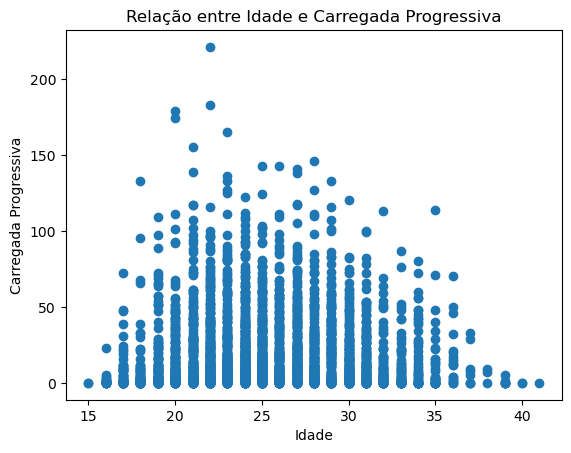

In [124]:
# Correlação entre Idade e Carregada Progressiva
Correlação_Idade_Carregada_Progressiva = df3_soccer['Idade'].corr(df3_soccer['Carregada Progressiva'])
print("Correlação entre idade e Carregada Progressiva:", Correlação_Idade_Carregada_Progressiva)
idade = df3_soccer['Idade']
gols = df3_soccer['Carregada Progressiva']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Carregada Progressiva')
plt.title('Relação entre Idade e Carregada Progressiva')
plt.show()

Correlação entre idade e Passes Progressivos: 0.16809462152183732


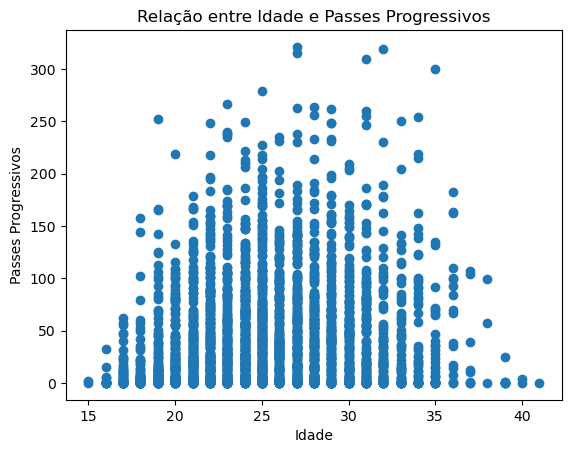

In [125]:
# Correlação entre Idade e Passes Progressivos
Correlação_Idade_Passes_Progressivos = df3_soccer['Idade'].corr(df3_soccer['Passes Progressivos'])
print("Correlação entre idade e Passes Progressivos:", Correlação_Idade_Passes_Progressivos)
idade = df3_soccer['Idade']
gols = df3_soccer['Passes Progressivos']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Passes Progressivos')
plt.title('Relação entre Idade e Passes Progressivos')
plt.show()

Correlação entre idade e Passes Progressivos Recebidos: 0.05886620429352972


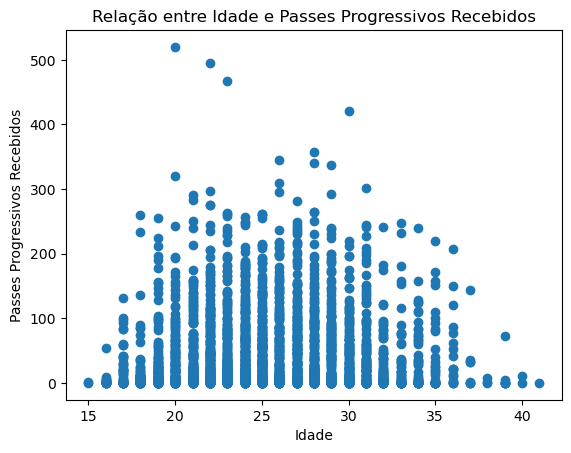

In [126]:
# Correlação entre Idade e Passes Progressivos Recebidos
Correlação_Idade_Passes_Progressivos_Recebidos= df3_soccer['Idade'].corr(df3_soccer['Passes Progressivos Recebidos'])
print("Correlação entre idade e Passes Progressivos Recebidos:", Correlação_Idade_Passes_Progressivos_Recebidos)
idade = df3_soccer['Idade']
gols = df3_soccer['Passes Progressivos Recebidos']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Passes Progressivos Recebidos')
plt.title('Relação entre Idade e Passes Progressivos Recebidos')
plt.show()

Correlação entre idade e Cartões Amarelos: 0.15489049919173367


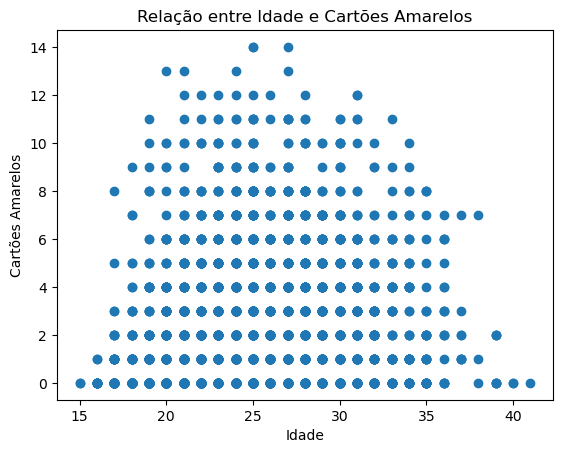

In [127]:
# Correlação entre Idade e Cartões Amarelos
Correlação_Idade_Cartões_Amarelos= df3_soccer['Idade'].corr(df3_soccer['Cartões Amarelos'])
print("Correlação entre idade e Cartões Amarelos:", Correlação_Idade_Cartões_Amarelos)
idade = df3_soccer['Idade']
gols = df3_soccer['Cartões Amarelos']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Cartões Amarelos')
plt.title('Relação entre Idade e Cartões Amarelos')
plt.show()

Correlação entre idade e Cartões Vermelhos: 0.0917703536262719


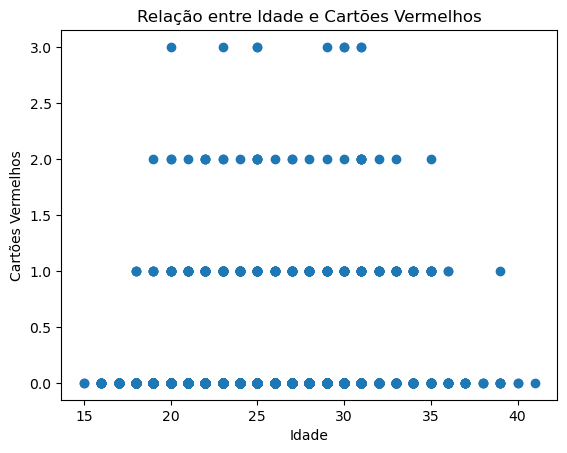

In [128]:
# Correlação entre Idade e Cartões Vermelhos
Correlação_Idade_Cartões_Vermelhos= df3_soccer['Idade'].corr(df3_soccer['Cartões Vermelhos'])
print("Correlação entre idade e Cartões Vermelhos:", Correlação_Idade_Cartões_Vermelhos)
idade = df3_soccer['Idade']
gols = df3_soccer['Cartões Vermelhos']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Cartões Vermelhos')
plt.title('Relação entre Idade e Cartões Vermelhos')
plt.show()

Correlação entre Gols e Passes Progressivos: 0.3161176461124365


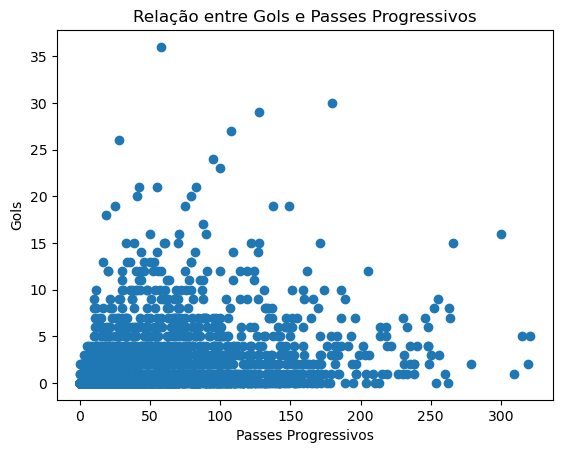

In [129]:
# Correlação entre Gols e Passes Progressivos
Correlação_Gols_Passes_Progressivos= df3_soccer['Gols'].corr(df3_soccer['Passes Progressivos'])
print("Correlação entre Gols e Passes Progressivos:", Correlação_Gols_Passes_Progressivos)
Passes_Progressivos = df3_soccer['Passes Progressivos']
gols = df3_soccer['Gols']

# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos, gols)
plt.xlabel('Passes Progressivos')
plt.ylabel('Gols')
plt.title('Relação entre Gols e Passes Progressivos')
plt.show()

Correlação entre Gols e Passes Progressivos: 0.05886620429352972


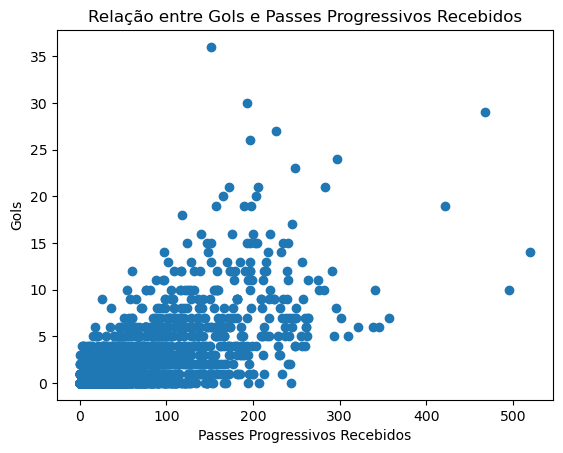

In [130]:
# Correlação entre Gols e Passes Progressivos Recebidos
Correlação_Gols_Passes_Progressivos_Recebidos= df3_soccer['Gols'].corr(df3_soccer['Passes Progressivos Recebidos'])
print("Correlação entre Gols e Passes Progressivos:", Correlação_Idade_Passes_Progressivos_Recebidos)
Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos']
gols = df3_soccer['Gols']

# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos_Recebidos, gols)
plt.xlabel('Passes Progressivos Recebidos')
plt.ylabel('Gols')
plt.title('Relação entre Gols e Passes Progressivos Recebidos')
plt.show()

Correlação entre Assistências e Passes Progressivos: 0.5297233998536256


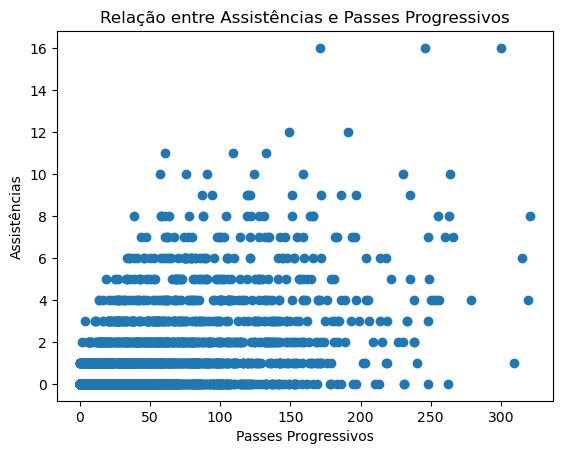

In [131]:
# Correlação entre Assistências e Passes Progressivos
Correlação_Assistências_Passes_Progressivos= df3_soccer['Assistências'].corr(df3_soccer['Passes Progressivos'])
print("Correlação entre Assistências e Passes Progressivos:", Correlação_Assistências_Passes_Progressivos)
Passes_Progressivos = df3_soccer['Passes Progressivos']
Assistências = df3_soccer['Assistências']
# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos, Assistências)
plt.xlabel('Passes Progressivos')
plt.ylabel('Assistências')
plt.title('Relação entre Assistências e Passes Progressivos')
plt.show()

Correlação entre Assistências e Passes Progressivos Recebidos: 0.7128033601996105


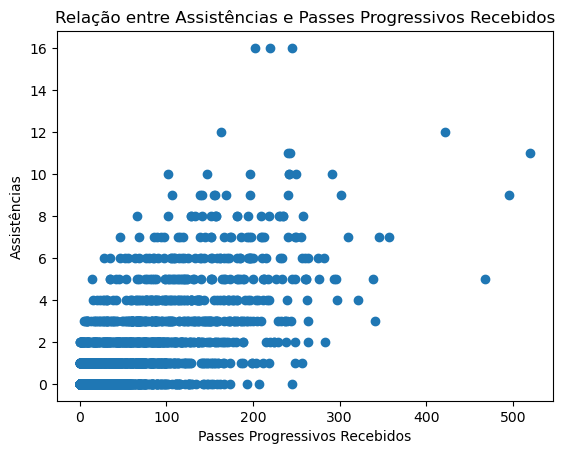

In [132]:
# Correlação entre Assistências e Passes Progressivos Recebidos
Correlação_Assistências_Passes_Progressivo_Recebidos= df3_soccer['Assistências'].corr(df3_soccer['Passes Progressivos Recebidos'])
print("Correlação entre Assistências e Passes Progressivos Recebidos:",Correlação_Assistências_Passes_Progressivo_Recebidos)
Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos']
Assistências = df3_soccer['Assistências']

# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos_Recebidos, Assistências)
plt.xlabel('Passes Progressivos Recebidos')
plt.ylabel('Assistências')
plt.title('Relação entre Assistências e Passes Progressivos Recebidos')
plt.show()

Correlação entre Passes Progressivos e Passes Progressivos Recebidos: 0.7128033601996105


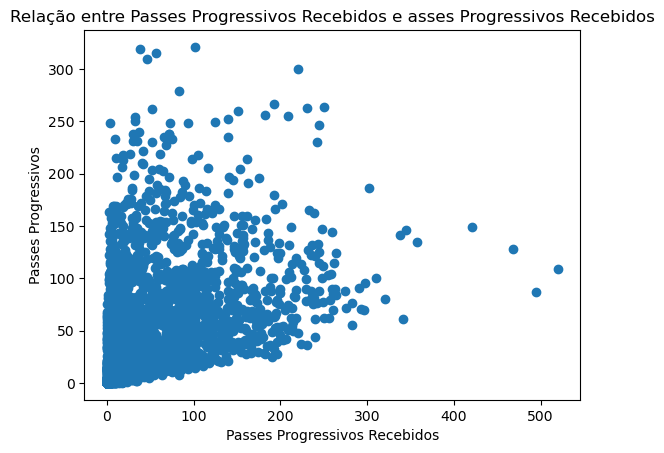

In [133]:
# Correlação entre Passes Progressivos e Passes Progressivos Recebidos
Correlação_Passes_Progressivo_Passes_Progressivo_Recebidos= df3_soccer['Passes Progressivos'].corr(df3_soccer['Passes Progressivos Recebidos'])
print("Correlação entre Passes Progressivos e Passes Progressivos Recebidos:",Correlação_Assistências_Passes_Progressivo_Recebidos)
Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos']
Passes_Progressivos = df3_soccer['Passes Progressivos']

# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos_Recebidos, Passes_Progressivos)
plt.xlabel('Passes Progressivos Recebidos')
plt.ylabel('Passes Progressivos')
plt.title('Relação entre Passes Progressivos Recebidos e asses Progressivos Recebidos')
plt.show()

## TESTE DE NORMALIDADE

Fazendo Teste de Normalidade para as colunas Idade,  Minutos jogados, Gols , Assistências ,Cartões Amarelos, Cartões Vermelhos
, Carregada Progressiva , Passes Progressivos e Passes Progressivos Recebidos.

# Importando as bibliotecas necessárias

In [134]:
import scipy
import scipy.stats
from sklearn.preprocessing import StandardScaler

In [135]:
# Teste de Normalidade para a coluna Idade
print('Para a coluna Idade: \n')
y_std = scipy.stats.zscore(df3_soccer['Idade'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Idade: 

array:
[-0.91418329 -1.56387017 -1.56387017 ... -0.48105871  1.46800193
  1.03487735]


Distância:
0.07246818595503329
p_value:
2.0490377533087674e-13


Os dados não seguem uma Distruição Normal


In [136]:
# Teste de Normalidade para a coluna Minutos jogados
print('Para a coluna Minutos jogados: \n')
y_std = scipy.stats.zscore(df3_soccer['Minutos jogados'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Minutos jogados: 

array:
[-0.59945162  0.01098264 -0.38255048 ... -0.59675055 -0.60305065
 -0.60017429]
Distância:
0.3041406474199371
p_value:
1.6811405588119428e-228
Os dados não seguem uma Distruição Normal


In [137]:
# Teste de Normalidade para a coluna Gols
print('Para a coluna Gols: \n')
y_std = scipy.stats.zscore(df3_soccer['Gols'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Gols: 

array:
[-0.21495568 -0.53162431 -0.53162431 ...  4.21840524 -0.21495568
  0.4183816 ]


Distância:
0.29129949430550295
p_value:
2.713003579327713e-209


Os dados não seguem uma Distruição Normal


In [138]:
# Teste de Normalidade para a coluna Assistências
print('Para a coluna Assistências: \n')
y_std = scipy.stats.zscore(df3_soccer['Assistências'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Assistências: 

array:
[ 0.96104489 -0.6130184  -0.6130184  ...  3.05979595 -0.08833064
 -0.6130184 ]


Distância:
0.27837360970026537
p_value:
7.298147895859103e-191


Os dados não seguem uma Distruição Normal


In [139]:
# Teste de Normalidade para a coluna Cartões Amarelos
print('Para a coluna Cartões Amarelos: \n')
y_std = scipy.stats.zscore(df3_soccer['Cartões Amarelos'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Cartões Amarelos: 

array:
[-0.21546126 -0.58531864 -0.95517602 ...  0.52425351  0.15439612
  2.37354042]


Distância:
0.17613246535194338
p_value:
4.8147955918842804e-76


Os dados não seguem uma Distruição Normal


In [140]:
# Teste de Normalidade para a coluna Cartões Vermelhos
print('Para a coluna Cartões Vermelhos: \n')
y_std = scipy.stats.zscore(df3_soccer['Cartões Vermelhos'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Cartões Vermelhos: 

array:
[-0.32673076 -0.32673076 -0.32673076 ... -0.32673076 -0.32673076
 -0.32673076]


Distância:
0.5177542119463051
p_value:
0.0


Os dados não seguem uma Distruição Normal


In [141]:
# Teste de Normalidade para a coluna Carregada Progressiva
print('Para a coluna Carregada Progressiva: \n')
y_std = scipy.stats.zscore(df3_soccer['Carregada Progressiva'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Carregada Progressiva: 

array:
[ 0.82741092 -0.50364679 -0.80788856 ...  2.34861973 -0.73182812
  0.67529004]


Distância:
0.16079176375687904
p_value:
1.9993899601332626e-63


Os dados não seguem uma Distruição Normal


In [142]:
# Teste de Normalidade para a coluna Passes Progressivos
print('Para a coluna Passes Progressivos: \n')
y_std = scipy.stats.zscore(df3_soccer['Passes Progressivos'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Passes Progressivos: 

array:
[ 0.73814474 -0.78563231 -0.89991559 ...  4.16664311 -0.34754641
  0.56671982]


Distância:
0.13384597885378868
p_value:
4.2271754532742746e-44


Os dados não seguem uma Distruição Normal


In [143]:
# Teste de Normalidade para a coluna Passes Progressivos Recebidos
print('Para a coluna Passes Progressivos Recebidos: \n')
y_std = scipy.stats.zscore(df3_soccer['Passes Progressivos Recebidos'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Passes Progressivos Recebidos: 

array:
[ 1.67854134 -0.51318472 -0.75491922 ...  2.35539792  0.40540635
  0.58267831]


Distância:
0.18021165092217817
p_value:
1.3444740778378498e-79


Os dados não seguem uma Distruição Normal


## Cramer's V correlation matrix 

C:\Users\user\AppData\Local\Temp\ipykernel_7232\3606016118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3_soccer.corr()


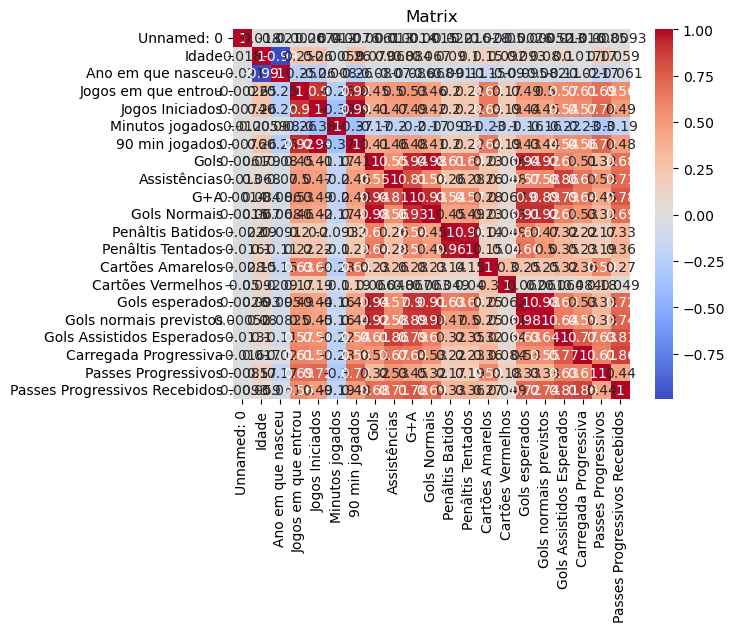

In [144]:
correlation_matrix = df3_soccer.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix')
plt.show()

## Best Fit Distribution 

Calcularei a Best Fit Distribution para as colunas Idade ,Jogos em que entrou , Minutos jogados, Gols, Assistências , Cartões Amarelos , Cartões Vermelhos, Carrega Progressiva, Passes Progressivos e Passes Progressivos Recebidos


In [145]:
# Colocando todos os tipos de Distribuição
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [146]:
# Criando uma função que vai checar que tipo de distribuição é para os dados repassados
def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [147]:
# Calculando o Best Fit Distribution para a Coluna Idade
y_std = scipy.stats.zscore(df3_soccer['Idade'].values)
y_std = y_std.flatten()
y_std

array([-0.91418329, -1.56387017, -1.56387017, ..., -0.48105871,
        1.46800193,  1.03487735])

In [148]:
# Calculando qual a distribuição para a coluna Idade
check_distribution(dist_names, y_std)


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
9   weibull_min  0.048452   4.247289e-06  no
0          beta  0.051580   7.455160e-07  no
10  weibull_max  0.054155   1.640355e-07  no
3       lognorm  0.057261   2.393938e-08  no
2         gamma  0.059096   7.301705e-09  no
5      pearson3  0.059096   7.300538e-09  no
6             t  0.072454   4.145189e-13  no
4          norm  0.072468   2.049038e-13  no
7        triang  0.107488   2.300365e-28  no
1         expon  0.275302  2.580475e-186  no
8       uniform  0.289806  8.118107e-207  no


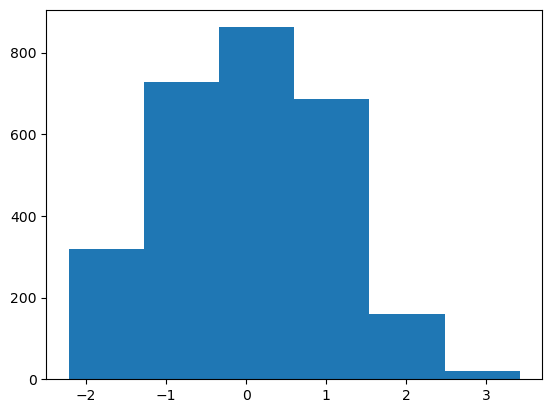

In [149]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [150]:
# Calculando o Best Fit Distribution para a Coluna Minutos jogados
y_std = scipy.stats.zscore(df3_soccer['Minutos jogados'].values)
y_std = y_std.flatten()
y_std

array([-0.59945162,  0.01098264, -0.38255048, ..., -0.59675055,
       -0.60305065, -0.60017429])

In [151]:
# Calculando qual a distribuição para a coluna jogados
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
3       lognorm  0.198180   5.949529e-96  no
0          beta  0.202484  3.479753e-100  no
2         gamma  0.241561  5.797542e-143  no
5      pearson3  0.268783  1.812917e-177  no
4          norm  0.304141  1.681141e-228  no
6             t  0.320972  9.452230e-255  no
9   weibull_min  0.339272  2.048435e-285  no
1         expon  0.530838   0.000000e+00  no
7        triang  0.557800   0.000000e+00  no
8       uniform  0.583846   0.000000e+00  no
10  weibull_max  0.602601   0.000000e+00  no


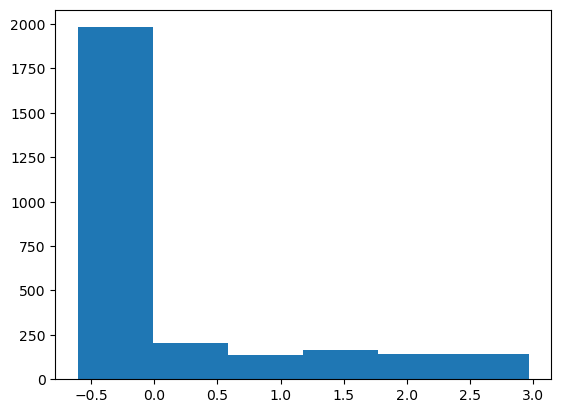

In [152]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [153]:
# Calculando o Best Fit Distribution para a Coluna Gols
y_std = scipy.stats.zscore(df3_soccer['Gols'].values)
y_std = y_std.flatten()
y_std

array([-0.21495568, -0.53162431, -0.53162431, ...,  4.21840524,
       -0.21495568,  0.4183816 ])

In [154]:
# # Calculando qual a distribuição para a coluna Gols
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
4          norm  0.291299  2.713004e-209  no
0          beta  0.528117   0.000000e+00  no
1         expon  0.528118   0.000000e+00  no
2         gamma  0.528110   0.000000e+00  no
3       lognorm  0.521921   0.000000e+00  no
5      pearson3  0.528118   0.000000e+00  no
6             t  0.523741   0.000000e+00  no
7        triang  0.655496   0.000000e+00  no
8       uniform  0.771009   0.000000e+00  no
9   weibull_min  0.528118   0.000000e+00  no
10  weibull_max  0.832785   0.000000e+00  no


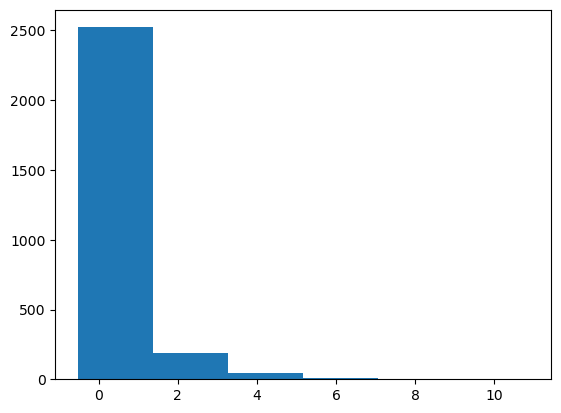

In [155]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [156]:
# Calculando o Best Fit Distribution para a Coluna Assistências
y_std = scipy.stats.zscore(df3_soccer['Assistências'].values)
y_std = y_std.flatten()
y_std

array([ 0.96104489, -0.6130184 , -0.6130184 , ...,  3.05979595,
       -0.08833064, -0.6130184 ])

In [157]:
# Calculando qual a distribuição para a coluna Assistências
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
4          norm  0.278374  7.298148e-191  no
0          beta  0.547870   0.000000e+00  no
1         expon  0.548306   0.000000e+00  no
2         gamma  0.548306   0.000000e+00  no
3       lognorm  0.546217   0.000000e+00  no
5      pearson3  0.548306   0.000000e+00  no
6             t  0.500000   0.000000e+00  no
7        triang  0.611337   0.000000e+00  no
8       uniform  0.710256   0.000000e+00  no
9   weibull_min  0.545794   0.000000e+00  no
10  weibull_max  0.812930   0.000000e+00  no


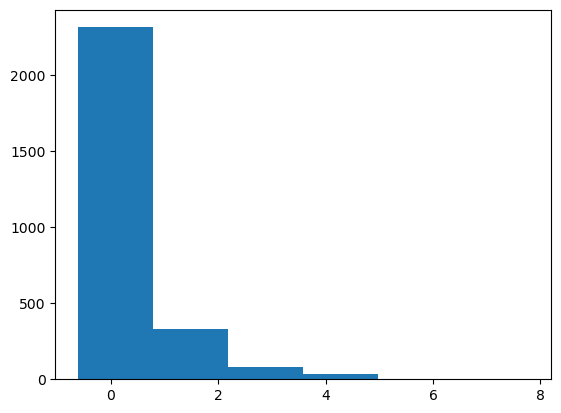

In [158]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [159]:
# Calculando o Best Fit Distribution para a Coluna Cartões Amarelos
y_std = scipy.stats.zscore(df3_soccer['Cartões Amarelos'].values)
y_std = y_std.flatten()
y_std

array([-0.21546126, -0.58531864, -0.95517602, ...,  0.52425351,
        0.15439612,  2.37354042])

In [160]:
# Calculando qual a distribuição para a coluna Cartões Amarelos
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
10  weibull_max  0.168273   3.943647e-69  no
4          norm  0.176132   4.814796e-76  no
6             t  0.181394   2.422023e-80  no
5      pearson3  0.288032  3.013265e-204  no
0          beta  0.288032  3.013120e-204  no
1         expon  0.288032  3.013120e-204  no
9   weibull_min  0.315764  2.289556e-246  no
7        triang  0.327770  6.373413e-266  no
2         gamma  0.337540  1.973393e-282  no
3       lognorm  0.456030   0.000000e+00  no
8       uniform  0.499434   0.000000e+00  no


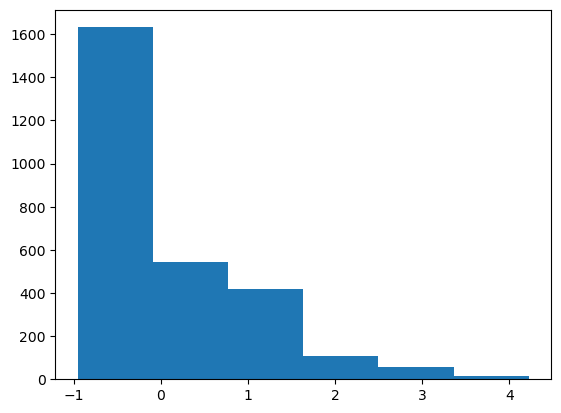

In [161]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [162]:
# Calculando o Best Fit Distribution para a Coluna Cartões Vermelhos
y_std = scipy.stats.zscore(df3_soccer['Cartões Vermelhos'].values)
y_std = y_std.flatten()
y_std

array([-0.32673076, -0.32673076, -0.32673076, ..., -0.32673076,
       -0.32673076, -0.32673076])

In [163]:
# Calculando qual a distribuição para a coluna Cartões Vermelhos
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.732030      0.0  no
1         expon  0.889690      0.0  no
2         gamma  0.564901      0.0  no
3       lognorm  0.881062      0.0  no
4          norm  0.517754      0.0  no
5      pearson3  0.889677      0.0  no
6             t  0.500000      0.0  no
7        triang  0.889610      0.0  no
8       uniform  0.889690      0.0  no
9   weibull_min  0.889690      0.0  no
10  weibull_max  0.820157      0.0  no


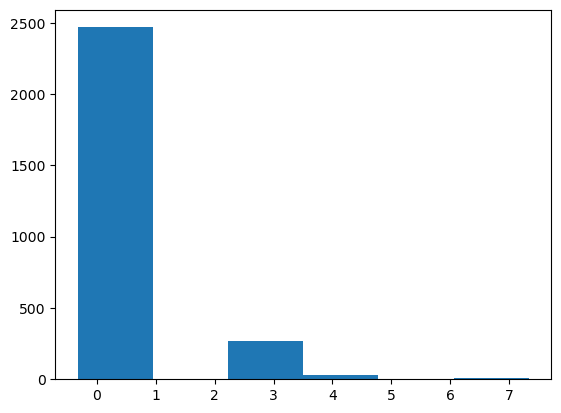

In [164]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [165]:
# Calculando o Best Fit Distribution para a Coluna Carregada Progressiva
y_std = scipy.stats.zscore(df3_soccer['Carregada Progressiva'].values)
y_std = y_std.flatten()
y_std

array([ 0.82741092, -0.50364679, -0.80788856, ...,  2.34861973,
       -0.73182812,  0.67529004])

In [166]:
# Calculando qual a distribuição para a coluna Carregada Progressiva
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
10  weibull_max  0.137587   2.880711e-46  no
4          norm  0.160792   1.999390e-63  no
5      pearson3  0.172314   1.718048e-72  no
2         gamma  0.172314   1.715504e-72  no
1         expon  0.183761   1.858202e-82  no
0          beta  0.188380   1.149703e-86  no
9   weibull_min  0.196109   5.989660e-94  no
6             t  0.239660  1.064425e-140  no
3       lognorm  0.351923  1.000878e-307  no
7        triang  0.491845   0.000000e+00  no
8       uniform  0.649188   0.000000e+00  no


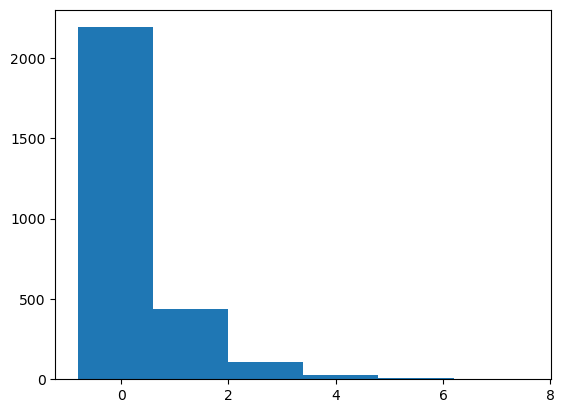

In [167]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [168]:
# Calculando o Best Fit Distribution para a Coluna Passes Progressivos
y_std = scipy.stats.zscore(df3_soccer['Passes Progressivos'].values)
y_std = y_std.flatten()
y_std

array([ 0.73814474, -0.78563231, -0.89991559, ...,  4.16664311,
       -0.34754641,  0.56671982])

In [169]:
# Calculando qual a distribuição para a coluna Passes Progressivos
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
10  weibull_max  0.120286   1.968002e-35  no
5      pearson3  0.127252   1.284018e-39  no
4          norm  0.133846   4.227175e-44  no
0          beta  0.155352   6.220245e-59  no
9   weibull_min  0.158888   1.217933e-61  no
1         expon  0.164316   6.411354e-66  no
2         gamma  0.192100   3.917578e-90  no
6             t  0.201204   6.470025e-99  no
3       lognorm  0.349280  5.483612e-303  no
7        triang  0.450733   0.000000e+00  no
8       uniform  0.544767   0.000000e+00  no


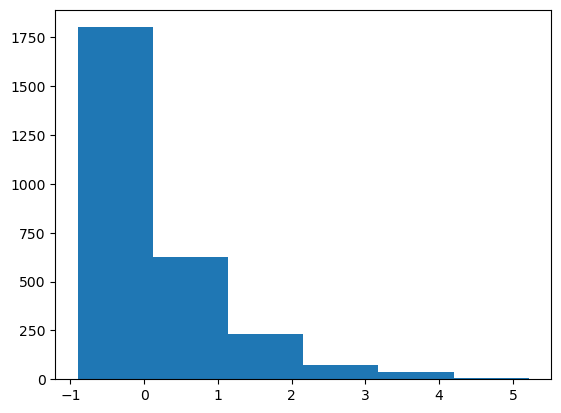

In [170]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [171]:
# Calculando o Best Fit Distribution para a Coluna Passes Progressivos Recebidos
y_std = scipy.stats.zscore(df3_soccer['Passes Progressivos Recebidos'].values)
y_std = y_std.flatten()
y_std

array([ 1.67854134, -0.51318472, -0.75491922, ...,  2.35539792,
        0.40540635,  0.58267831])

In [172]:
# Calculando qual a distribuição para a coluna Passes Progressivos Recebidos
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
5      pearson3  0.156813   4.811613e-60  no
9   weibull_min  0.156813   4.811378e-60  no
4          norm  0.180212   1.344474e-79  no
10  weibull_max  0.225393  2.618429e-124  no
1         expon  0.228610  6.521588e-128  no
6             t  0.300501  1.153452e-222  no
0          beta  0.543135   0.000000e+00  no
2         gamma  0.402509   0.000000e+00  no
3       lognorm  0.463091   0.000000e+00  no
7        triang  0.387443   0.000000e+00  no
8       uniform  0.652076   0.000000e+00  no


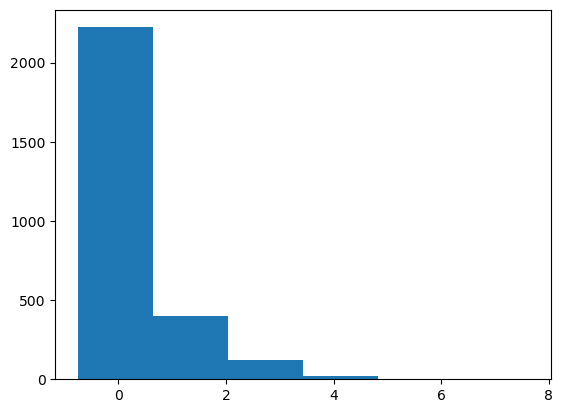

In [173]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()